## 🎓 Graduate Admission Analysis

🎯 **Objective** : With the vast amount of student data at their disposal, The Institute seeks a deeper understanding of the graduate admissions process. The goal is to create a predictive model that estimates a student's chances of admission based on various parameters.

📊 **Project Breakdown** :
In this analytical journey, the following methodologies and techniques will be employed:
1. 🔍 **Exploratory Data Analysis (EDA)**
2. 📈 **Statistical Inference**
3. 🛠 **Feature Engineering**
4. 🧪 **Hypothesis Testing**
5. 📐 **Linear Regression Implementation**



## Library Set-up

In [ ]:
# Scientific libraries
import numpy as np
import pandas as pd
import scipy
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visual libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Helper libraries (Not that important, can be skipped)
import warnings
warnings.filterwarnings('ignore')

# Visual setup (With the figure format set as retina, high resolution plots can be generated)
%config InlineBackend.figure_format = 'retina'

# Pandas options (If you have 2 to 3 lines of code in a single block, it will
# show the output of all the lines of codes not just the output of last line of code)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Table styles (This is just for making the df table look decorative, not important)
table_styles = {
    'cerulean_palette': [
        dict(selector="th", props=[("color", "#FFFFFF"), ("background", "#004D80"), ("text-transform", "capitalize")]),
        dict(selector="td", props=[("color", "#333333")]),
        dict(selector="table", props=[("font-family", 'Arial'), ("border-collapse", "collapse")]),
        dict(selector='tr:nth-child(even)', props=[('background', '#D3EEFF')]),
        dict(selector='tr:nth-child(odd)', props=[('background', '#FFFFFF')]),
        dict(selector="th", props=[("border", "1px solid #0070BA")]),
        dict(selector="td", props=[("border", "1px solid #0070BA")]),
        dict(selector="tr:hover", props=[("background", "#80D0FF")]),
        dict(selector="tr", props=[("transition", "background 0.5s ease")]),
        dict(selector="th:hover", props=[("font-size", "1.07rem")]),
        dict(selector="th", props=[("transition", "font-size 0.5s ease-in-out")]),
        dict(selector="td:hover", props=[('font-size', '1.07rem'),('font-weight', 'bold')]),
        dict(selector="td", props=[("transition", "font-size 0.5s ease-in-out")])
    ]
}

In [ ]:
!wget -O Jamboree_Admission.csv https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv


In [ ]:
df = pd.read_csv('Jamboree_Admission.csv')
df.head()

In [ ]:
# Removing serial number column as we have index
df.drop(columns=['Serial No.'],inplace=True)

In [ ]:
# There were leading/trailing spaces in the column names so removed those spaces
df.columns=df.columns.str.strip()

In [ ]:
# Renaming columns for convenience
rename_dict={'GRE Score':'gre','TOEFL Score':'toefl','University Rating':'uni_rating',
            'SOP':'sop','LOR':'lor','CGPA':'cgpa','Research':'research',
            'Chance of Admit':'admission_chance'}

df.rename(columns=rename_dict,inplace=True)
df

gre  toefl  uni_rating  sop  lor  cgpa  research  admission_chance
0    337    118           4  4.5  4.5  9.65         1              0.92
1    324    107           4  4.0  4.5  8.87         1              0.76
2    316    104           3  3.0  3.5  8.00         1              0.72
3    322    110           3  3.5  2.5  8.67         1              0.80
4    314    103           2  2.0  3.0  8.21         0              0.65
..   ...    ...         ...  ...  ...   ...       ...               ...
495  332    108           5  4.5  4.0  9.02         1              0.87
496  337    117           5  5.0  5.0  9.87         1              0.96
497  330    120           5  4.5  5.0  9.56         1              0.93
498  312    103           4  4.0  5.0  8.43         0              0.73
499  327    113           4  4.5  4.5  9.04         0              0.84

[500 rows x 8 columns]

## Basic exploration and Data wrangling
### Basic exploration


In [ ]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gre               500 non-null    int64  
 1   toefl             500 non-null    int64  
 2   uni_rating        500 non-null    int64  
 3   sop               500 non-null    float64
 4   lor               500 non-null    float64
 5   cgpa              500 non-null    float64
 6   research          500 non-null    int64  
 7   admission_chance  500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


count       mean        std     min       25%     50%  \
gre               500.0  316.47200  11.295148  290.00  308.0000  317.00   
toefl             500.0  107.19200   6.081868   92.00  103.0000  107.00   
uni_rating        500.0    3.11400   1.143512    1.00    2.0000    3.00   
sop               500.0    3.37400   0.991004    1.00    2.5000    3.50   
lor               500.0    3.48400   0.925450    1.00    3.0000    3.50   
cgpa              500.0    8.57644   0.604813    6.80    8.1275    8.56   
research          500.0    0.56000   0.496884    0.00    0.0000    1.00   
admission_chance  500.0    0.72174   0.141140    0.34    0.6300    0.72   

                     75%     max  
gre               325.00  340.00  
toefl             112.00  120.00  
uni_rating          4.00    5.00  
sop                 4.00    5.00  
lor                 4.00    5.00  
cgpa                9.04    9.92  
research            1.00    1.00  
admission_chance    0.82    0.97

### Understanding the dataset
Column                     | Description                         
---------------------------|---------------------------------------
gre                        | GRE Scores (out of 340)              |
toefl                      | TOEFL Scores (out of 120)            |
uni_rating                 | University Rating (out of 5)         |
sop                        | Statement of Purpose (out of 5)      |
lor                        | Lettor of recommendation (out of 5)  |
cgpa                       | Undergraduate GPA (out of 10)        |
research                   | Research Experience (either 0 or 1)  |
admission chance           | Chance of Admit (ranging from 0 to 1)|
                        

### Data Wrangling

In [ ]:
# A function to check number of unique values and unique value list
def unique_values(col):
    print(f"Number of unique values of {col.upper()}----> {df[col].nunique()}")
    print(f"List of unique values = {df[col].unique()}")
    print(f"---------------------------------------------------------------")

In [ ]:
cols = df.columns
for i in cols:
    unique_values(i)

Number of unique values of GRE----> 49
List of unique values = [337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]
---------------------------------------------------------------
Number of unique values of TOEFL----> 29
List of unique values = [118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]
---------------------------------------------------------------
Number of unique values of UNI_RATING----> 5
List of unique values = [4 3 2 5 1]
---------------------------------------------------------------
Number of unique values of SOP----> 9
List of unique values = [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
---------------------------------------------------------------
Number of unique values of LOR----> 9
List of unique values = [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
----------------

### Observation from the above calculation:
* GRE, TOEFL, CGPA and Admission Chance can be considered as numerical continous data.
* Research, LOR, SOP, University rating can be considered as ordinal data type.


In [ ]:
categorical = ['sop','lor','research','uni_rating']
numerical = ['gre','toefl','cgpa','admission_chance']

# Function to convert sop,lor,research,uni_rating to categorical
def convert_to_cat(col):
    df[col]=pd.Categorical(df[col],categories=df[col].sort_values().unique(),ordered=True)

In [ ]:
# Converting sop,lor,research,uni_rating into categories
# COnverting these into categories decreases memory usage as well
for i in categorical:
    convert_to_cat(i)

In [ ]:
df.info() # Memory usage went from 31.4 kb to 18.8 kb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gre               500 non-null    int64   
 1   toefl             500 non-null    int64   
 2   uni_rating        500 non-null    category
 3   sop               500 non-null    category
 4   lor               500 non-null    category
 5   cgpa              500 non-null    float64 
 6   research          500 non-null    category
 7   admission_chance  500 non-null    float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 18.8 KB


## checking for null values

In [ ]:
df.isna().sum()

gre                 0
toefl               0
uni_rating          0
sop                 0
lor                 0
cgpa                0
research            0
admission_chance    0
dtype: int64

Fortunately there are no missing values

## Outlier Detection

In [ ]:
# Function to find outlier percentage
def outlier_percentage(cols):
    for i in cols:
        q3=df[i].quantile(0.75)
        q1=df[i].quantile(0.25)
        iqr = q3-q1
        outlier=df[(df[i]>q3+(1.5*iqr)) | (df[i]<max(q1-(1.5*iqr),0))] #since all values are positive
        per = len(outlier)/len(df)
        print(f"Outlier Percentage of {i} ------> {per}")
        print("-------------------------------------------")



In [ ]:
outlier_percentage(numerical)

Outlier Percentage of gre ------> 0.0
-------------------------------------------
Outlier Percentage of toefl ------> 0.0
-------------------------------------------
Outlier Percentage of cgpa ------> 0.0
-------------------------------------------
Outlier Percentage of admission_chance ------> 0.004
-------------------------------------------


* No outliers in GRE,TOEFL, CGPA
* Admission_chance has very few number of outliers so no need to remove them.

### Data integrity checks
* Check whether LOP,SOP,Uni_rating data is between 0-5 and not less than 0 or more than 5.
* Check whether Admission Chance is between 0-1 and not less than 0 or more than 1.
* Check whether research has only 0 and 1 and no other value.
* Check whether Cgpa is between 0 to 10.
* Check whether GRE score is between 0 to 340.
* Check whether TOEFL score is between 0 to 120.

In [ ]:
# Assert method throws an error if any of the below statemnts doesn't hold true
assert max(df['lor'])<=5 and min(df['lor'])>=0
assert max(df['sop'])<=5 and min(df['sop'])>=0
assert max(df['uni_rating'])<=5 and min(df['uni_rating'])>=0
assert max(df['gre'])<=340 and min(df['gre'])>=0
assert max(df['research'])==1 and min(df['research'])==0
assert max(df['cgpa'])<=10 and min(df['cgpa'])>=0
assert max(df['admission_chance'])<=1 and min(df['admission_chance'])>=0
assert max(df['toefl'])<=120 and min(df['toefl'])>=0

Did not get any error when I executed the above statement this means no issues
with our data

## Checking for duplicates

In [ ]:
df.duplicated().value_counts()

False    500
Name: count, dtype: int64

No duplicate rows

In [ ]:
# final dataset:
display(df.head(15).style.set_table_styles(table_styles['cerulean_palette']).set_caption("Jamboree Admissions"))


In [ ]:
display(df.describe().style.set_table_styles(table_styles['cerulean_palette']).set_caption("Jamboree Admissions Summary"))

## Visual Analysis

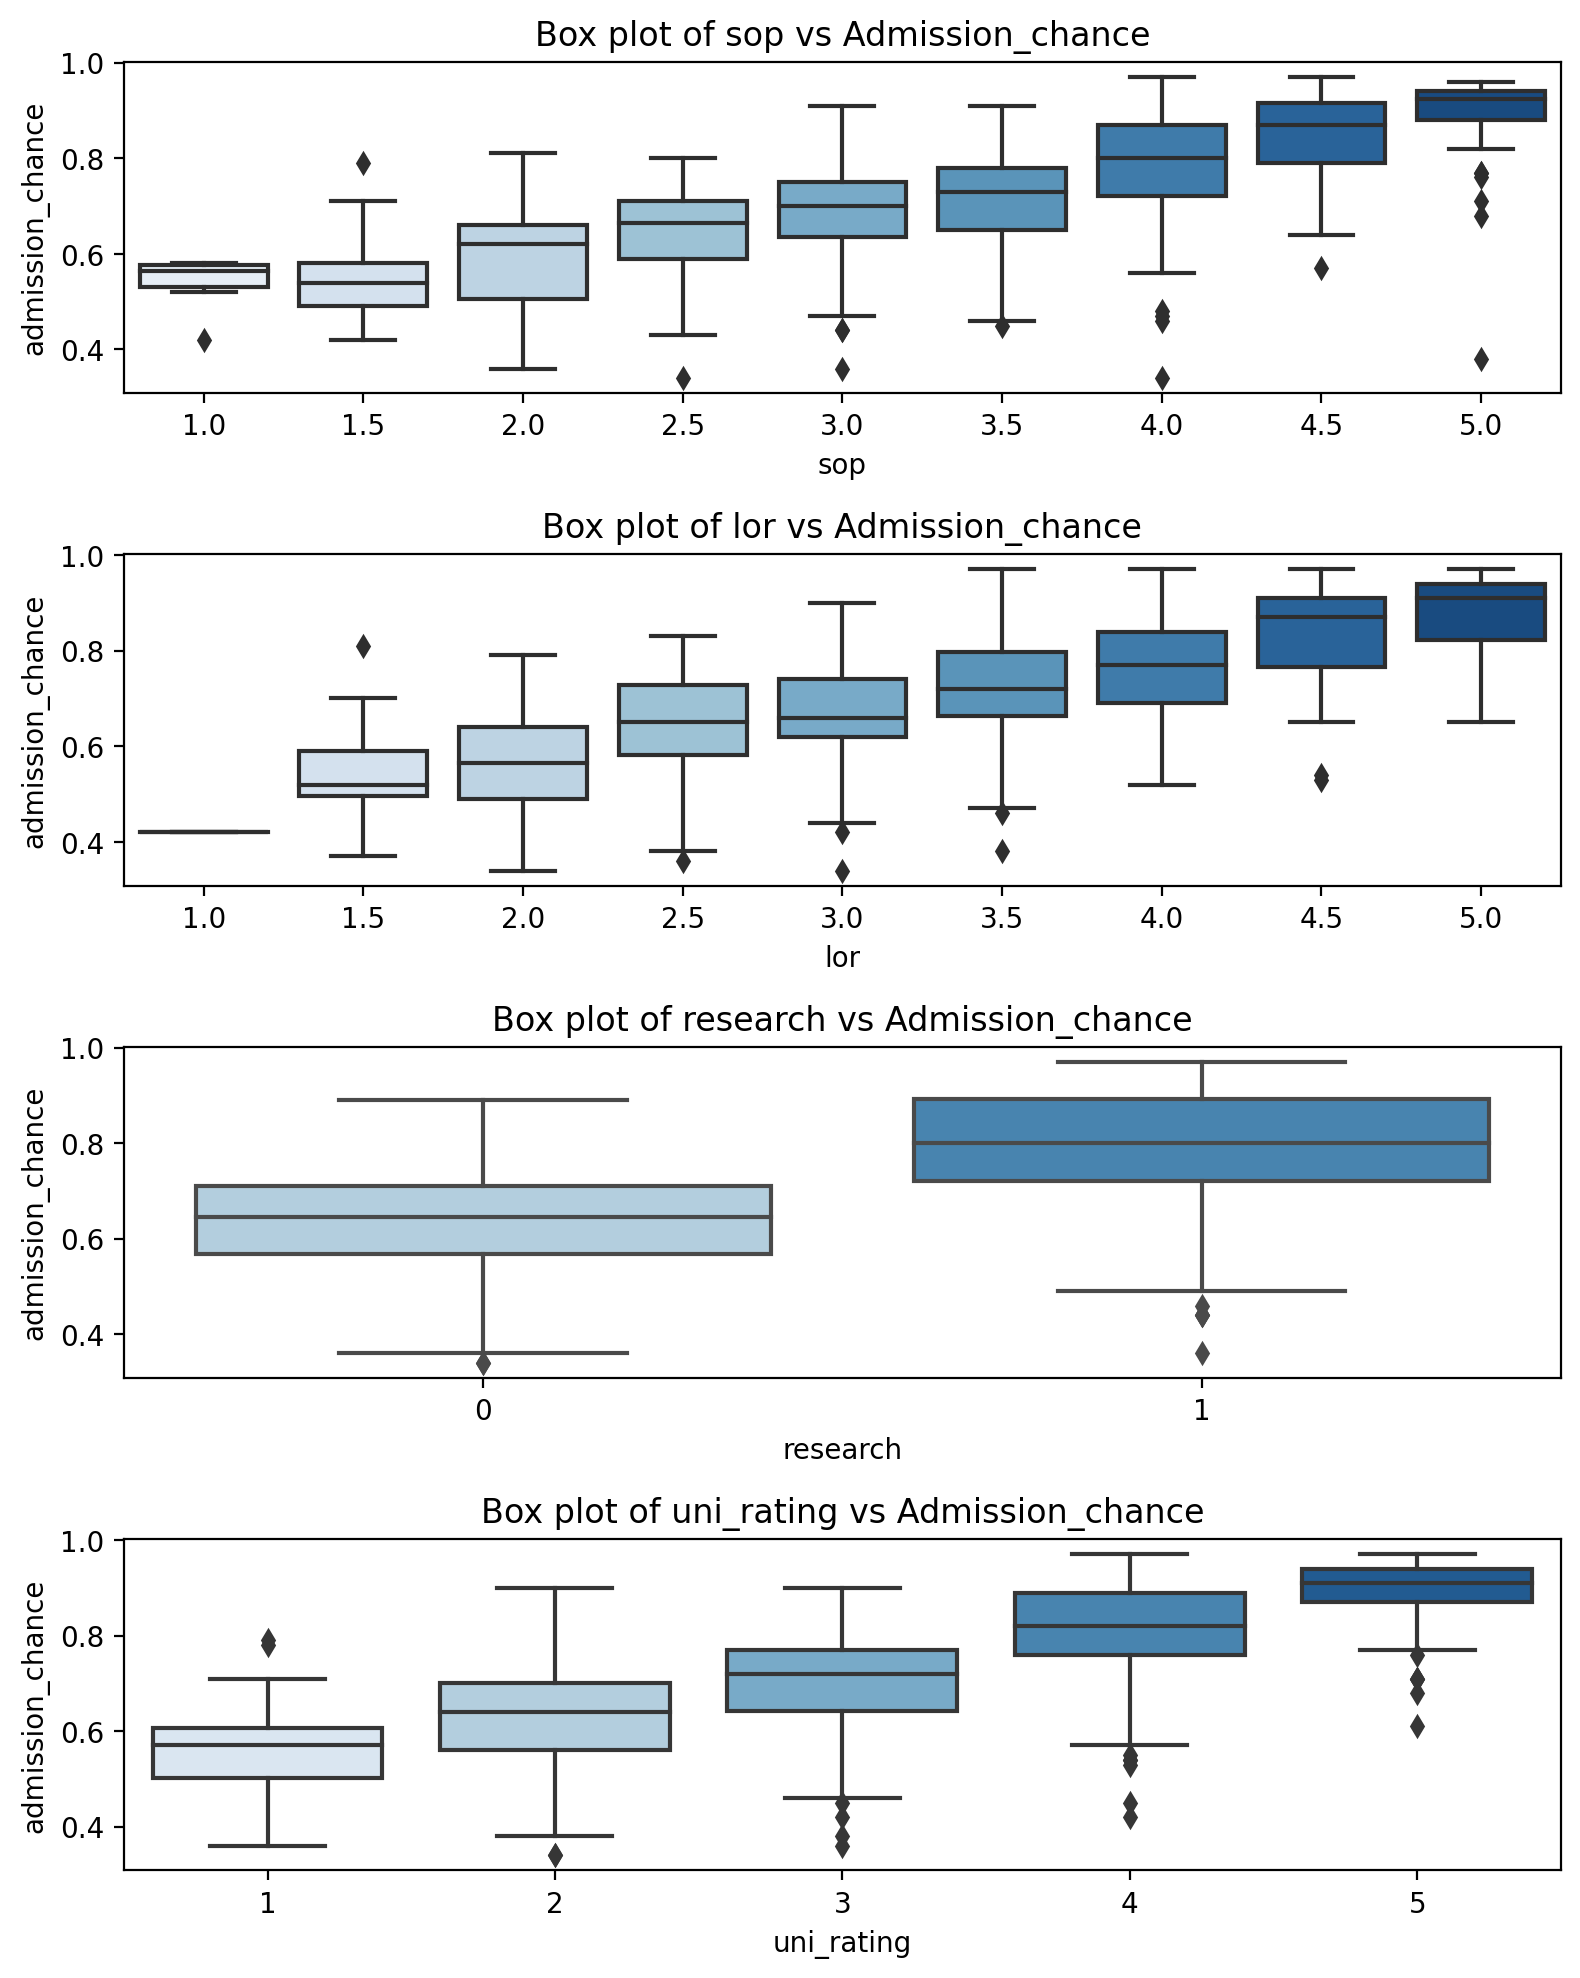

In [ ]:
fig,axes = plt.subplots(4,1,figsize=(8,10))
def boxplots_categorical(col):
    for i in range(len(col)):
        sns.boxplot(data=df,x=col[i],y='admission_chance',palette='Blues',ax=axes[i])
        axes[i].set_title(f"Box plot of {col[i]} vs Admission_chance")
        plt.tight_layout()
    plt.show()

boxplots_categorical(categorical)


### Observation from the above boxplots:
* Visually the admission chance of students who has a higher university rating, LOR, SOP is more. This should be confirmed by doing a hypothesis testing which will be done in the later part of this analysis.
* Visually admission chance of students who has done research work is more.

<Axes: >

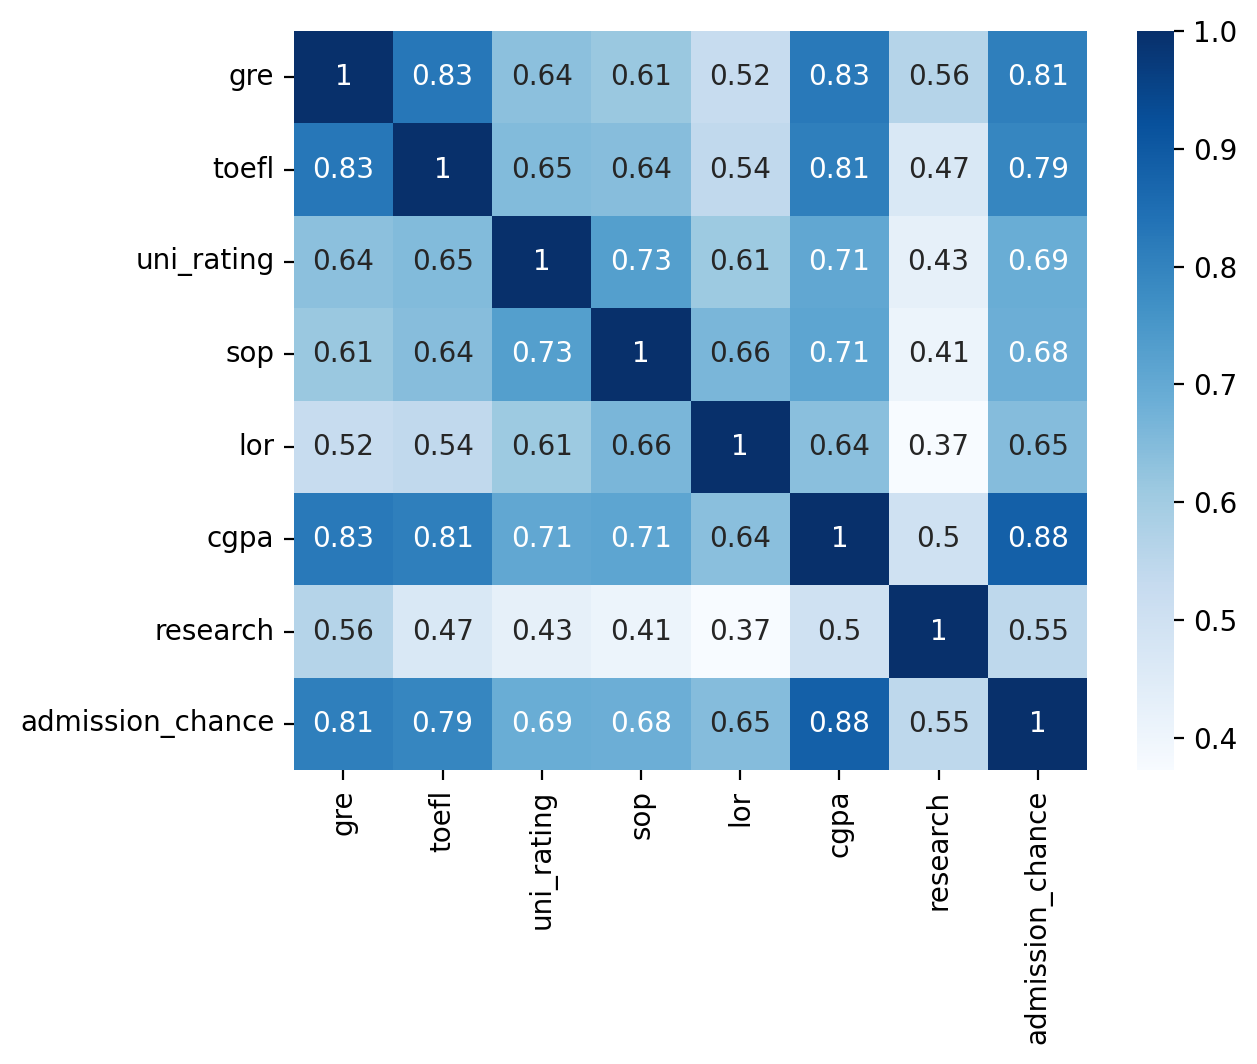

In [ ]:
# The below is the peason correlation heatmap, it measures the linear
# relationship between two continuous variables.
pearson_corr=df.corr()
sns.heatmap(data=pearson_corr,annot=True,cmap='Blues')

<Axes: >

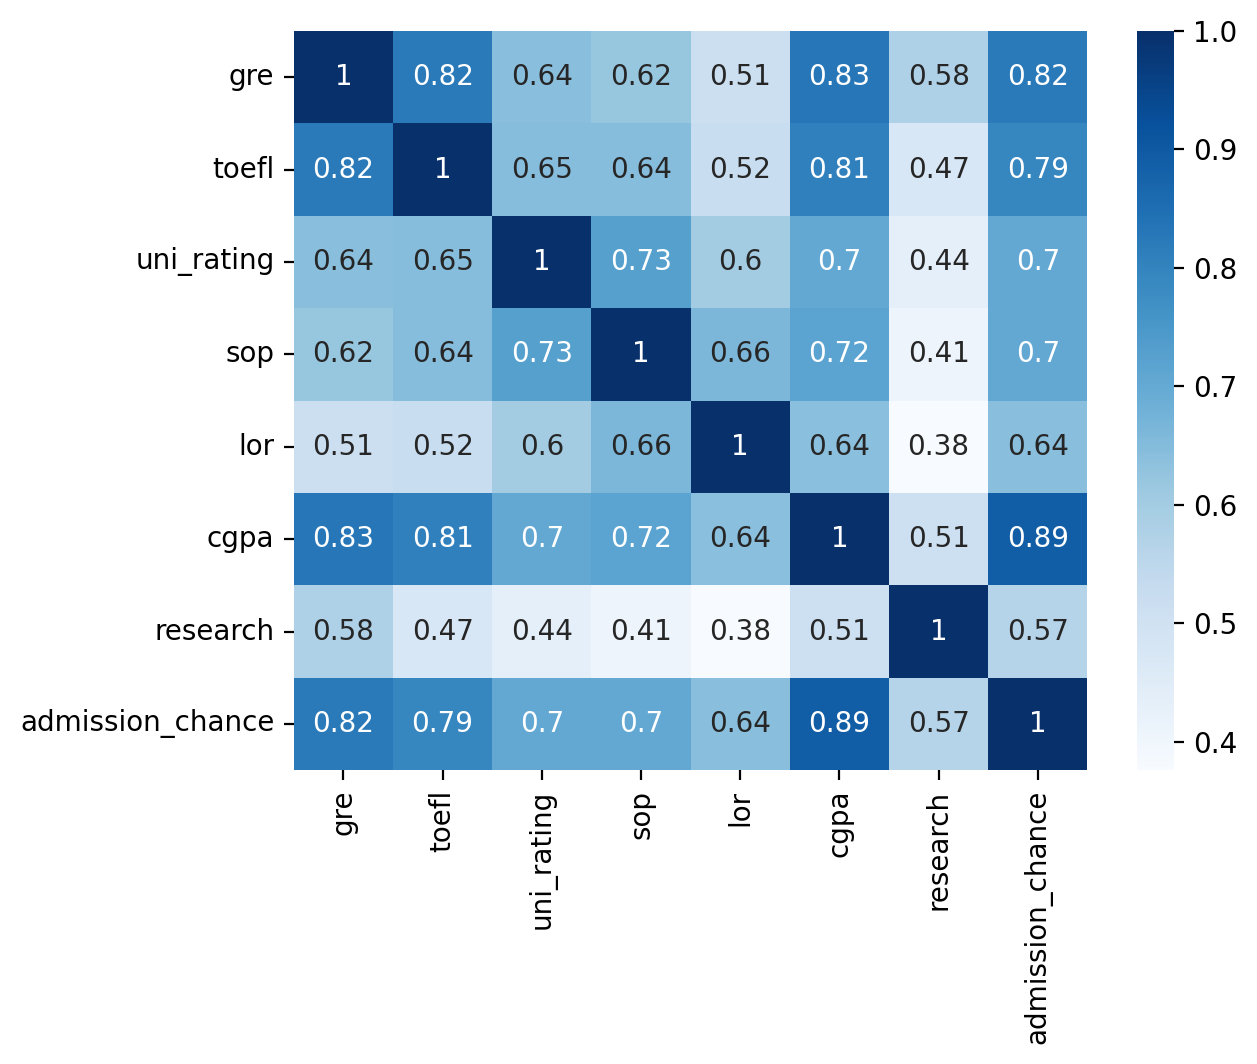

In [ ]:
# The below is the spearman correlation heatmap which measures the the strength and
# direction of the monotonic relationship between two variables. It captures non linear parts as well.
spearman_corr = df.corr(method='spearman')
sns.heatmap(data=spearman_corr,cmap='Blues',annot=True)

### Observations from the above heatmap
* There is a strong positive correlation of CGPA,GRE and TOEFL with the admission chance.
* There is a good positive correlation between GRE score and CGPA, Toefl and CGPA.
* The spearman correlation values are almost equal to spearman correlation values which indicates a linear relationship. We will use this fact later to check whether we should use linear regression or polynomial regression.

In [ ]:
df_new=df.copy()
print(f"Minimum score in GRE = {df['gre'].min()}")
print(f"Maximum score in GRE = {df['gre'].max()}")
df_new['admission bin'] = pd.cut(df['admission_chance'],bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
                                labels = ['0-9%', '10-19%', '20-29%', '30-39%', '40-49%', '50-59%',
                                        '60-69%', '70-79%', '80-89%', '90-100%'])
df_new['gre bin']=pd.cut(df['gre'],bins=[290,300,310,320,330,340],
                        labels = ['290-299','300-309','310-320','321-330','330-340'])
df_new

Minimum score in GRE = 290
Maximum score in GRE = 340


gre  toefl uni_rating  sop  lor  cgpa research  admission_chance  \
0    337    118          4  4.5  4.5  9.65        1              0.92   
1    324    107          4  4.0  4.5  8.87        1              0.76   
2    316    104          3  3.0  3.5  8.00        1              0.72   
3    322    110          3  3.5  2.5  8.67        1              0.80   
4    314    103          2  2.0  3.0  8.21        0              0.65   
..   ...    ...        ...  ...  ...   ...      ...               ...   
495  332    108          5  4.5  4.0  9.02        1              0.87   
496  337    117          5  5.0  5.0  9.87        1              0.96   
497  330    120          5  4.5  5.0  9.56        1              0.93   
498  312    103          4  4.0  5.0  8.43        0              0.73   
499  327    113          4  4.5  4.5  9.04        0              0.84   

    admission bin  gre bin  
0         90-100%  330-340  
1          70-79%  321-330  
2          70-79%  310-320  
3          70-79%  321-330  
4          60-69%  310-320  
..            ...      ...  
495        80-89%  330-340  
496       90-100%  330-340  
497       90-100%  321-330  
498        70-79%  310-320  
499        80-89%  321-330  

[500 rows x 10 columns]

<Axes: xlabel='admission bin', ylabel='gre bin'>

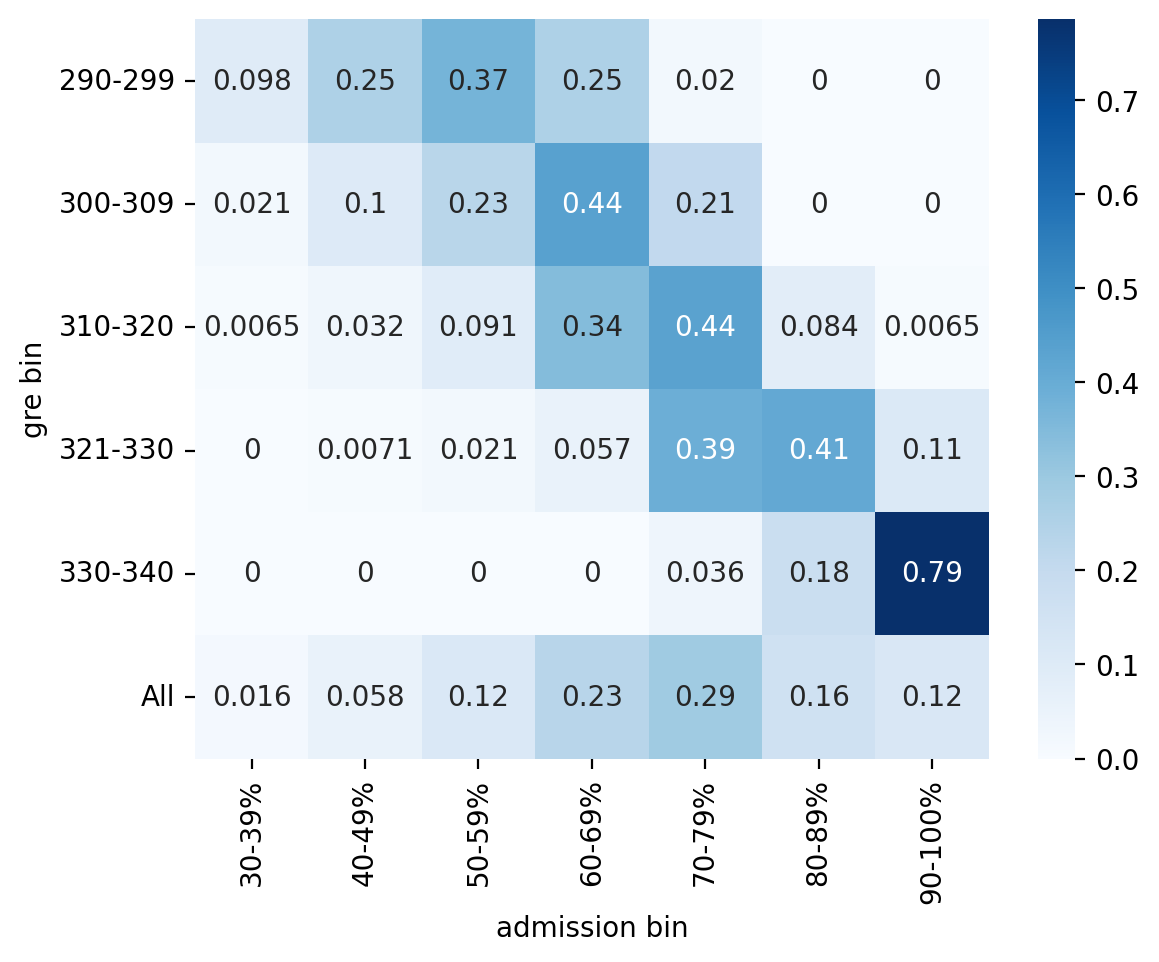

In [ ]:
# Probability of Admission chance with Gre score:
gre_admission = pd.crosstab(columns=df_new['admission bin'],index=df_new['gre bin'],normalize='index',
                   margins = True)

sns.heatmap(data=gre_admission,annot=True,cmap='Blues')
_=plt.yticks(rotation=0)

<Axes: xlabel='admission bin', ylabel='toefl bin'>

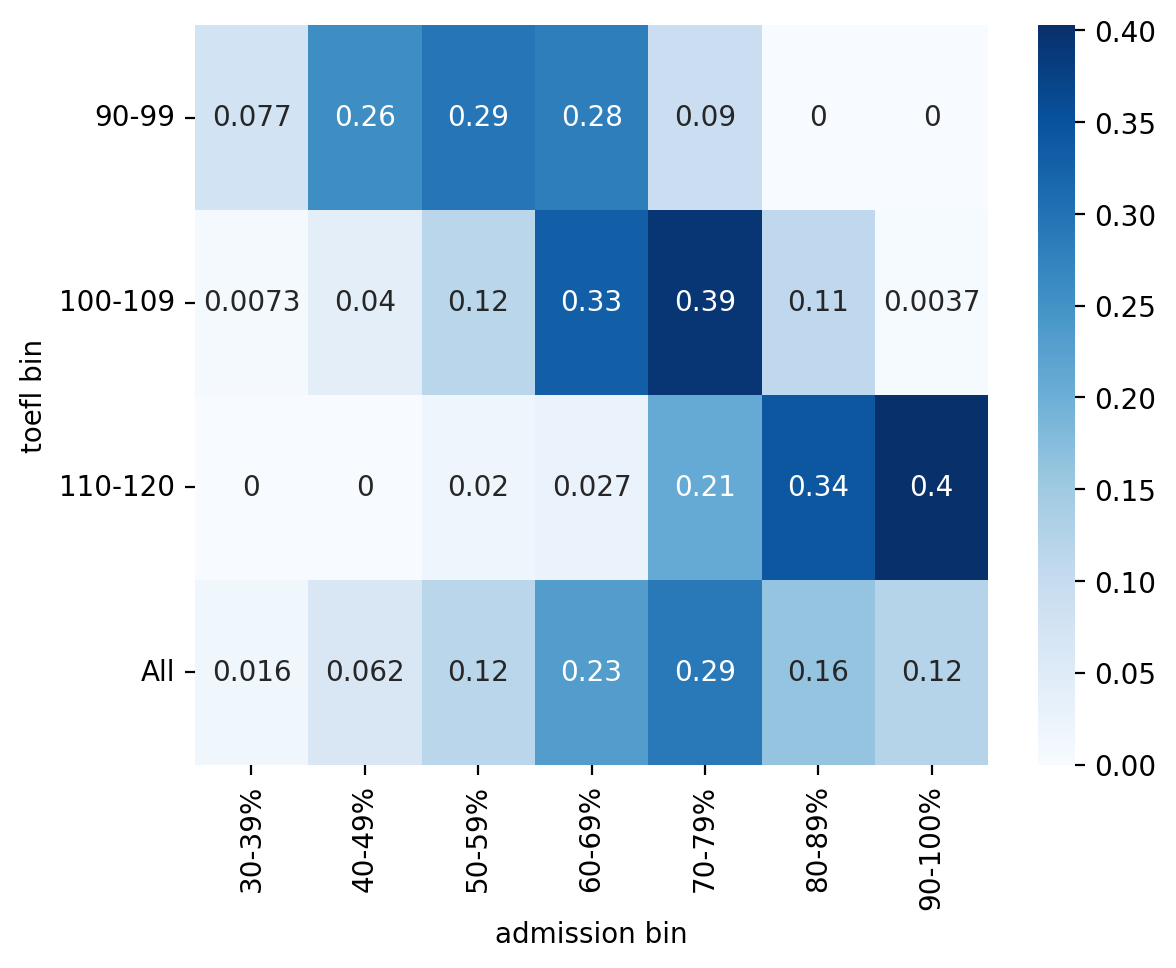

In [ ]:
# Probabilty of Admission chance with TOEFL score
df_new['toefl bin'] = pd.cut(df_new['toefl'], bins=np.arange(90, 121, 10),
       labels=['90-99', '100-109', '110-120'])

toefl_admission = pd.crosstab(index=df_new['toefl bin'],columns=df_new['admission bin'],
                             margins=True,normalize='index')
sns.heatmap(data=toefl_admission,cmap='Blues',annot=True)
_=plt.yticks(rotation=0)

### Observation from the above 2 heatmaps
* The probability that a student has an admission chance of more than 0.9 if he/she scores in the range between 110-120 is 0.4. This means if a student has scored between 110-120 he/she has a 40% probabilty that his admission chance will be more than 90%.
* The probability that a student has an admission chance of more than 0.9 if he/she scores in the range between 330-340 is 0.79. This means if a student has scored between 330-340 he/she has a 79% probabilty that his admission chance will be more than 90%.
* We can conclude that good scroes in toefl and gre increases the admission chances.

In [ ]:
def scatterplots(col):
    plt.figure(figsize=(25,8))
    for i in range(len(col)):
        if col[i]=='admission_chance':
            continue
        plt.subplot(1,3,i+1)

        sns.scatterplot(data=df,x=col[i],y='admission_chance',hue='research',palette='deep')
        plt.title(f"{col[i]} vs admission_chance")
        plt.tight_layout()
    plt.show()



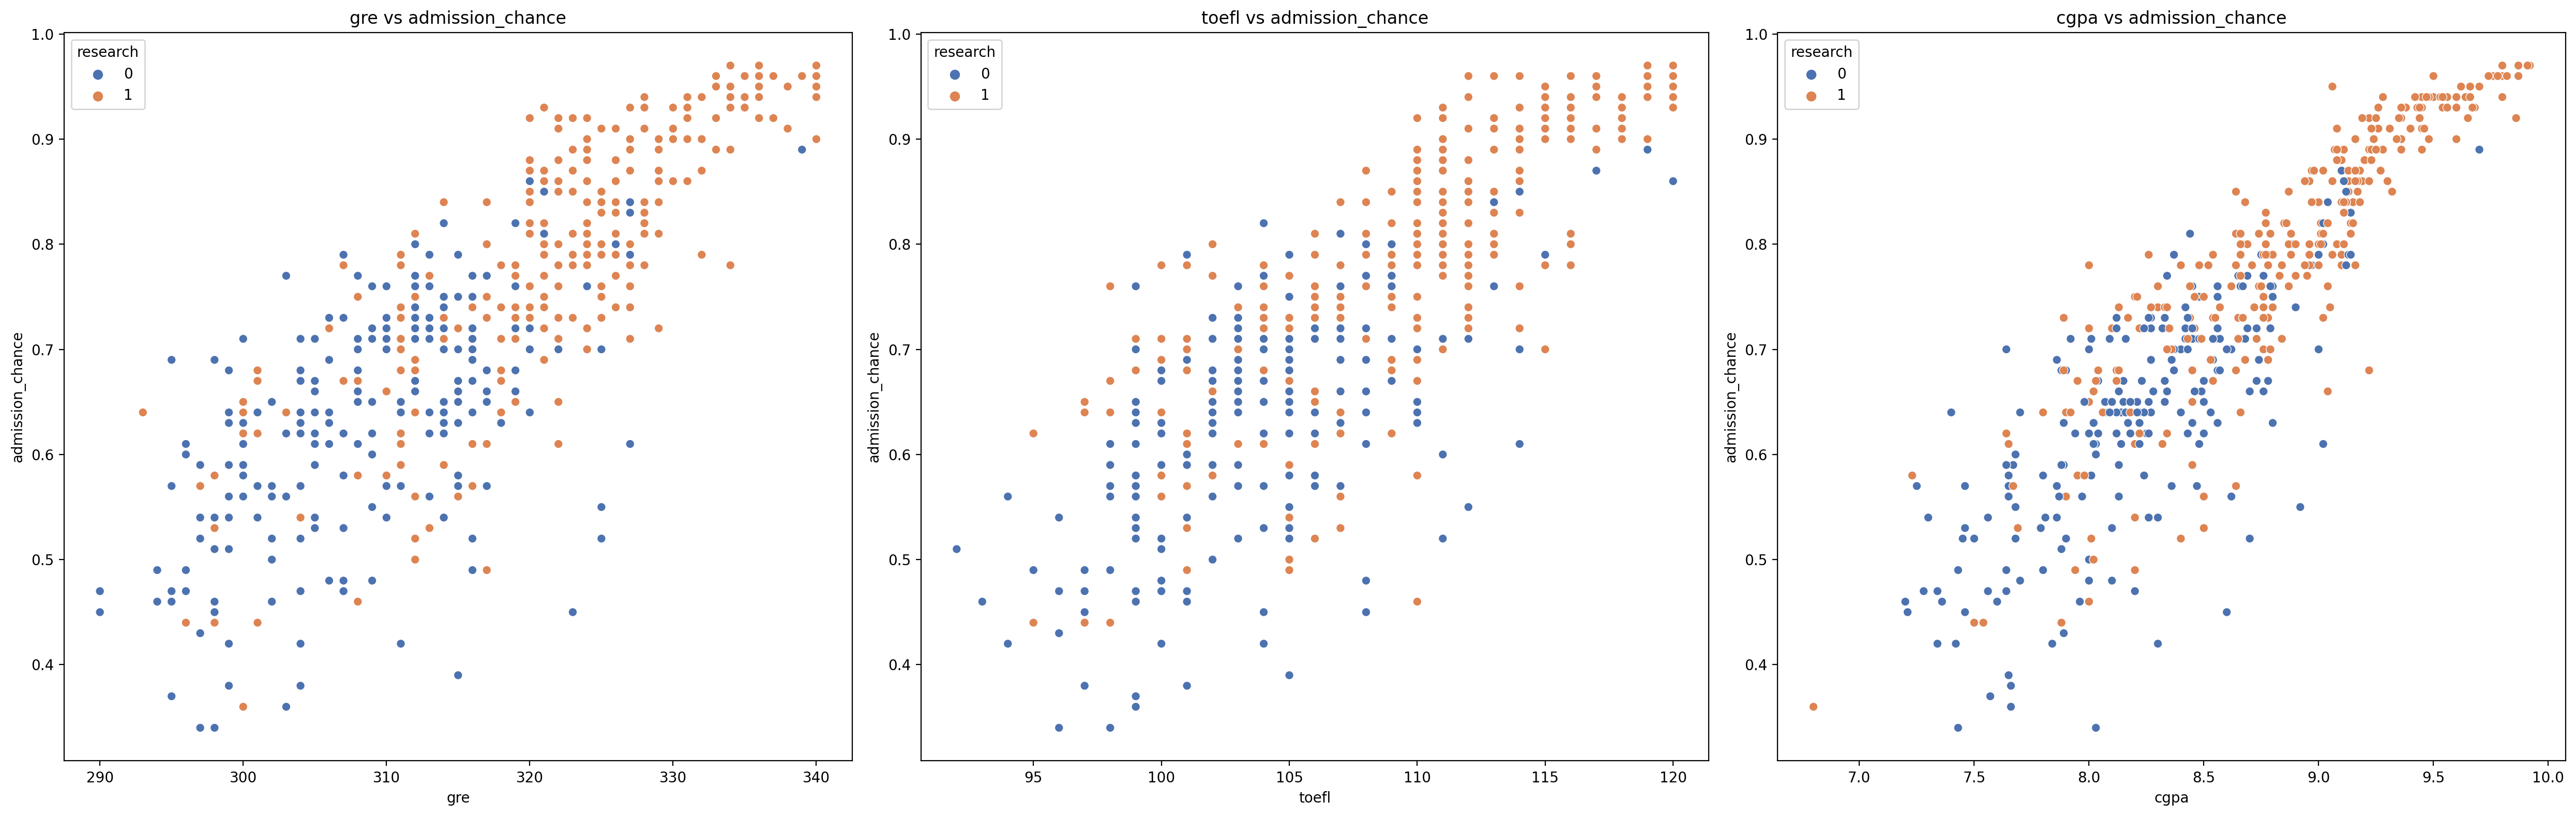

In [ ]:
scatterplots(numerical)

### Observations from the above scatterplots
* The above plots show that the students who do research work are more likely to get the admission.
* Gre scores, toefl scores and cgpa seems to follow a linear pattern with admission chances.


In [ ]:
def countplots(col):
    fig,axes=plt.subplots(4,1,figsize=(6,8))
    for i in range(len(col)):
        sns.countplot(data=df,x=col[i],hue='research',ax=axes[i],palette='Blues')
        axes[i].set_title(f"Count plot of {col[i]}")
    plt.tight_layout()
    plt.show()

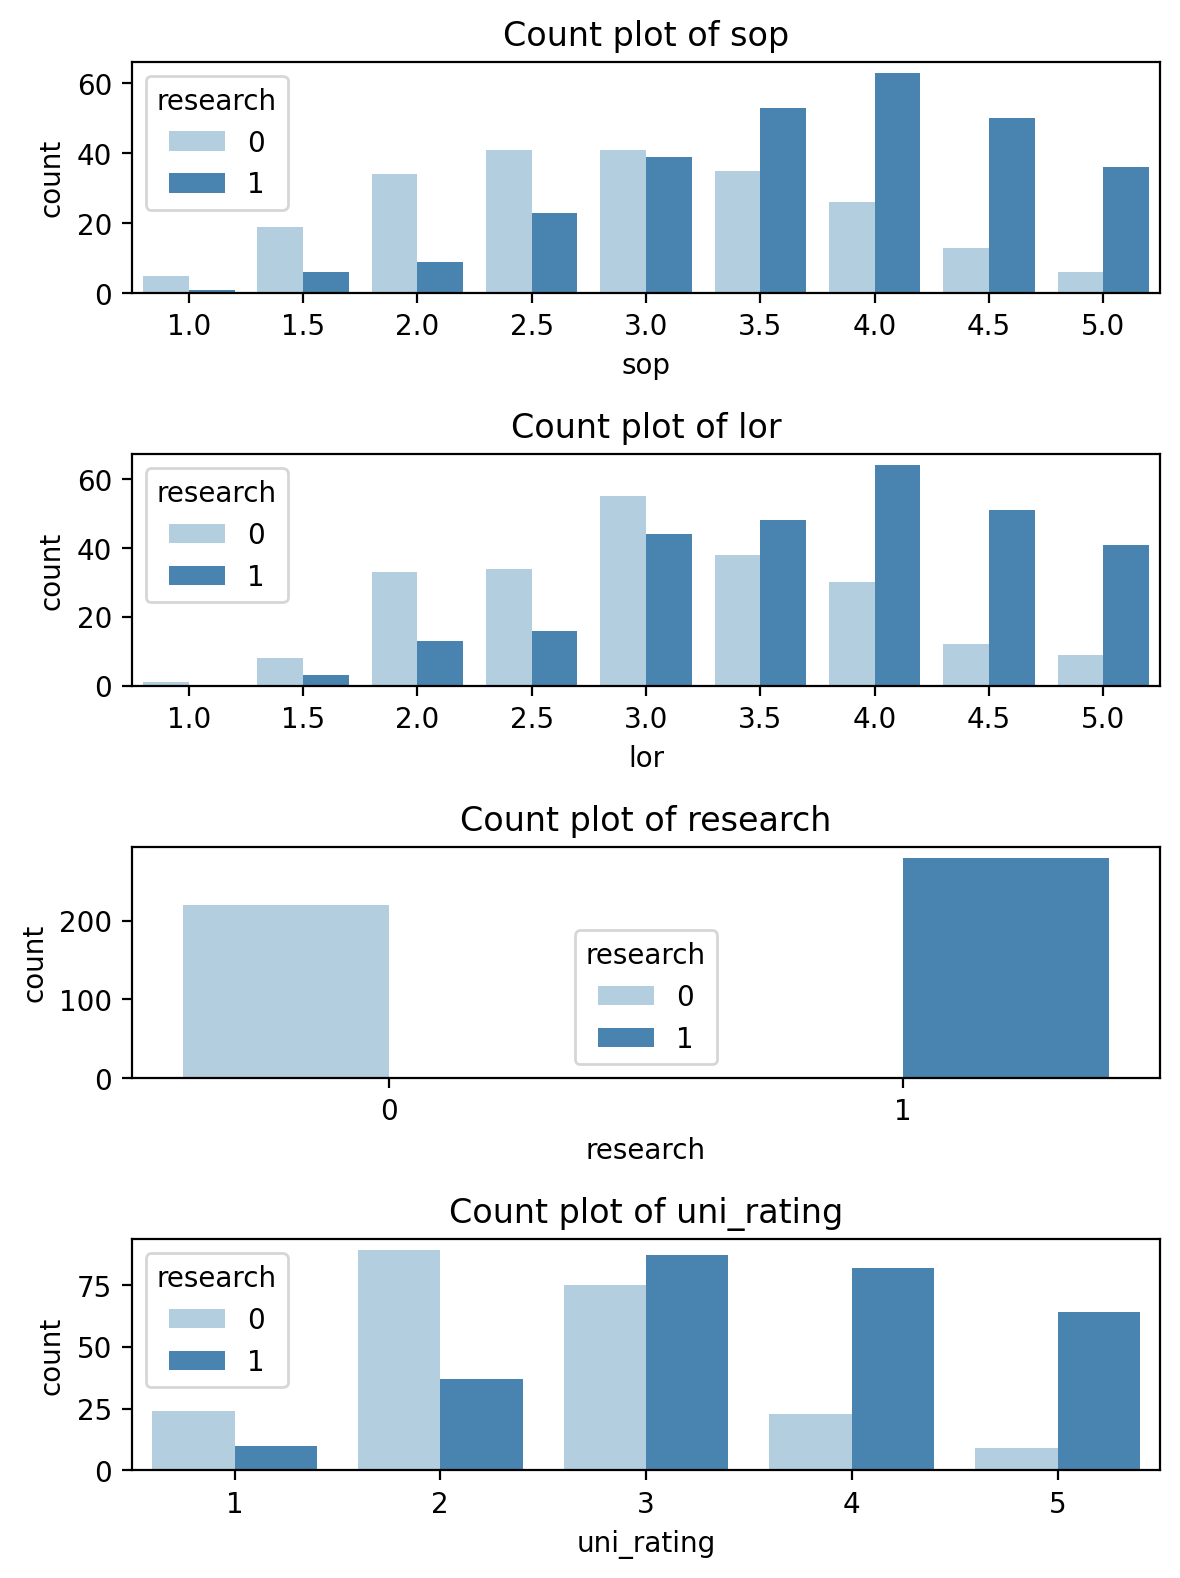

In [ ]:
countplots(categorical)

### Observations from the above plots
* Most of the students with SOP rating of more than 3 have done research work.
* Most of the students with LOR rating more than 3 or equal to 3 have done research work.
* More than half of all the students have done the research work.


In [ ]:

def kdeplots(col):
    plt.figure(figsize=(25,5))
    for i in range(len(col)):
        plt.subplot(1,4,i+1)
        sns.histplot(data=df,x=col[i],kde=True,bins=40,palette='pastel',label=col[i].title())

    plt.show()

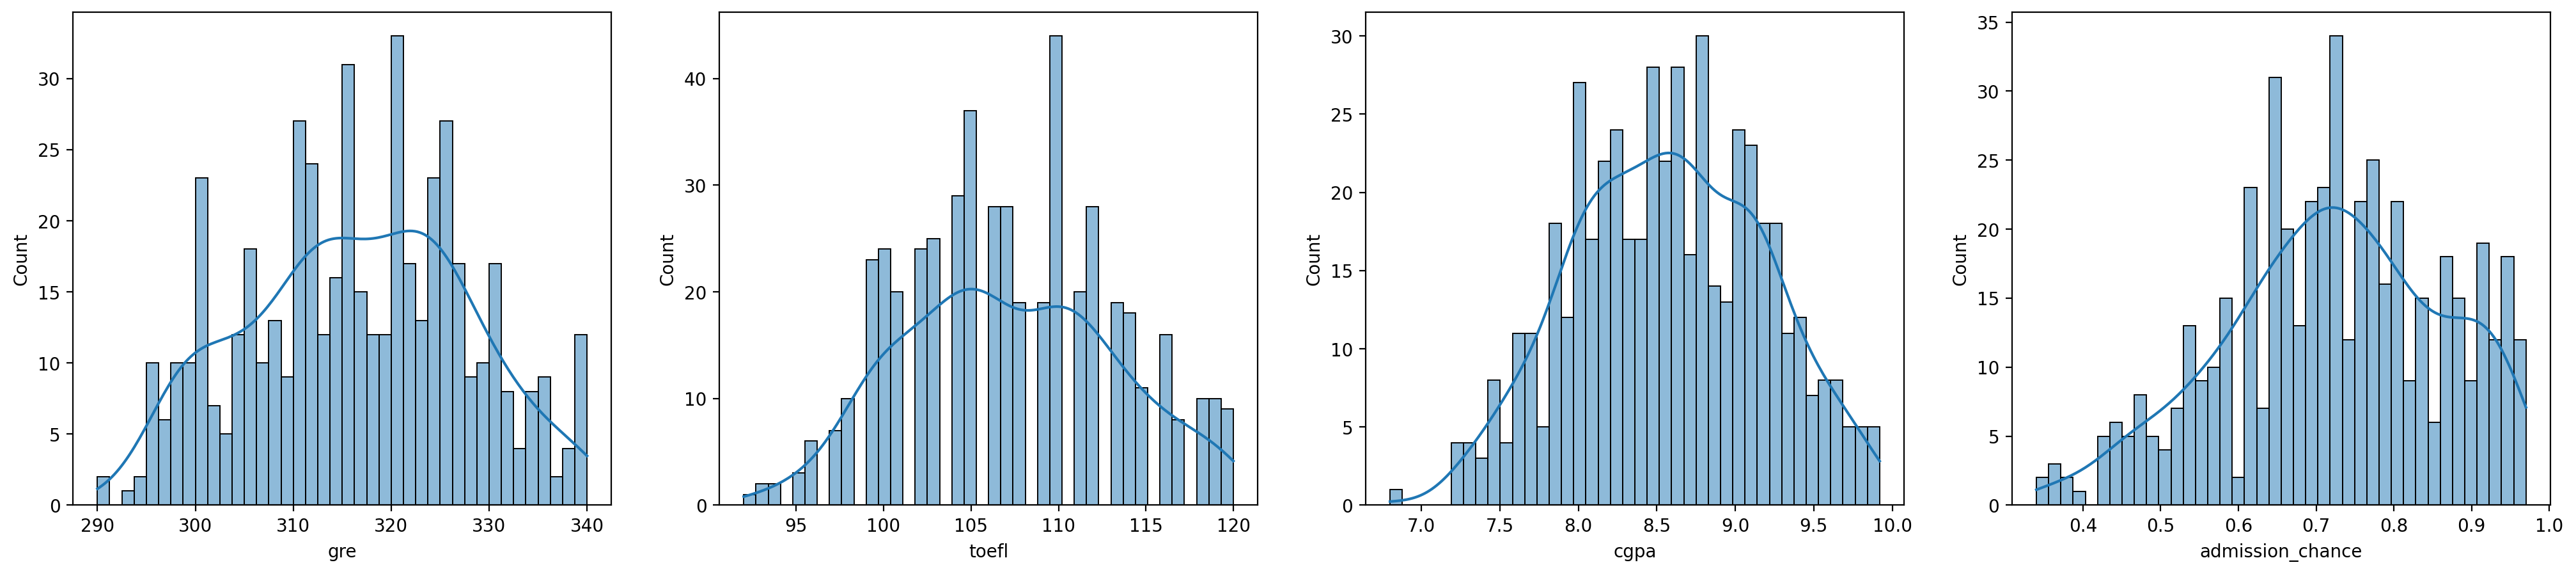

In [ ]:
kdeplots(numerical)

### Observations from the histplots
* The distribution of GRE score, Toefl score, CGPA and Admission chance looks guassian. However this will be tested using a hypothesis test later in this notebook.
* The admission chacne is skewed left.

## Hypothesis Testing

* Let's check whether there is a significance difference between mean admission chance based on the categorical columns like LOR and research on admission chance.
* Let's check whether there is a strong correlaton between GRE score, TOEFL score and CGPA on admission chance.

### Hypothesis testing to find the significance of LOR rating:
Is there a statistically significant difference in the likelihood of admission among different levels of Letter of Recommendation strength?

Since categories of LOR is more than 3, ANOVA test will be useful here,let's check whether the assumtions of ANOVA holds true.

### Assumptions of ANOVA:
* The distribution of each group of admission chance values for different LOR values (1,1.5,2,2.5... etc) should be normal.
* The observations within each group are independent of each other. This means that the value of one observation does not influence the value of another observation.
* The spread of the data points (variance) is consistent across all groups of LOR (1,1.5,2,2.5,3... etc)

In [ ]:
# Assumption 1
# Let's use shapiro wilk test for checking the normality

df1=df[df['lor']==1.0]['admission_chance']
df2=df[df['lor']==1.5]['admission_chance']
df3=df[df['lor']==2.0]['admission_chance']
df4=df[df['lor']==2.5]['admission_chance']
df5=df[df['lor']==3.0]['admission_chance']
df6=df[df['lor']==3.5]['admission_chance']
df7=df[df['lor']==4.0]['admission_chance']
df8=df[df['lor']==4.5]['admission_chance']
df9=df[df['lor']==5.0]['admission_chance']



### Defining null and alternate hypothesis
* H0 : The distribution of Admission chance for different LOR groups is normal.
* HA : The distribution of Admission chance for different LOR groups is not normal.

In [ ]:
# For shapiro wilk test there must be at least 3 datapoints, since in df1 there is only 1
# datapoint
list_df=[df2,df3,df4,df5,df6,df7,df8,df9]
def shapiro(list_df):
    for i in range(len(list_df)):
        test_stat,pval=scipy.stats.shapiro(list_df[i])
        if pval<0.05:
            print(f"Data is not normal")
        else:
            print(f"Data is normal")


In [ ]:
shapiro(list_df)

Data is normal
Data is normal
Data is not normal
Data is normal
Data is normal
Data is normal
Data is not normal
Data is not normal


Most of the Data is normal, shapiro wilk test is very strict, so let's plot QQ plot and check the data normality

In [ ]:
# QQplots of these distributions:
# The plt.gca() specifies that the current axes, obtained using plt.gca(), should be used for the Q-Q plot.
listed_df=[df1,df2,df3,df4,df5,df6,df7,df8,df9]
fig=plt.figure(figsize=(25,5))
def qqplots(listed):
    for i in range(len(listed)):
        plt.subplot(3,3,i+1)
        sm.qqplot(listed[i],line='s',ax=plt.gca())
        plt.tight_layout()
    plt.show()


<Figure size 2500x500 with 0 Axes>

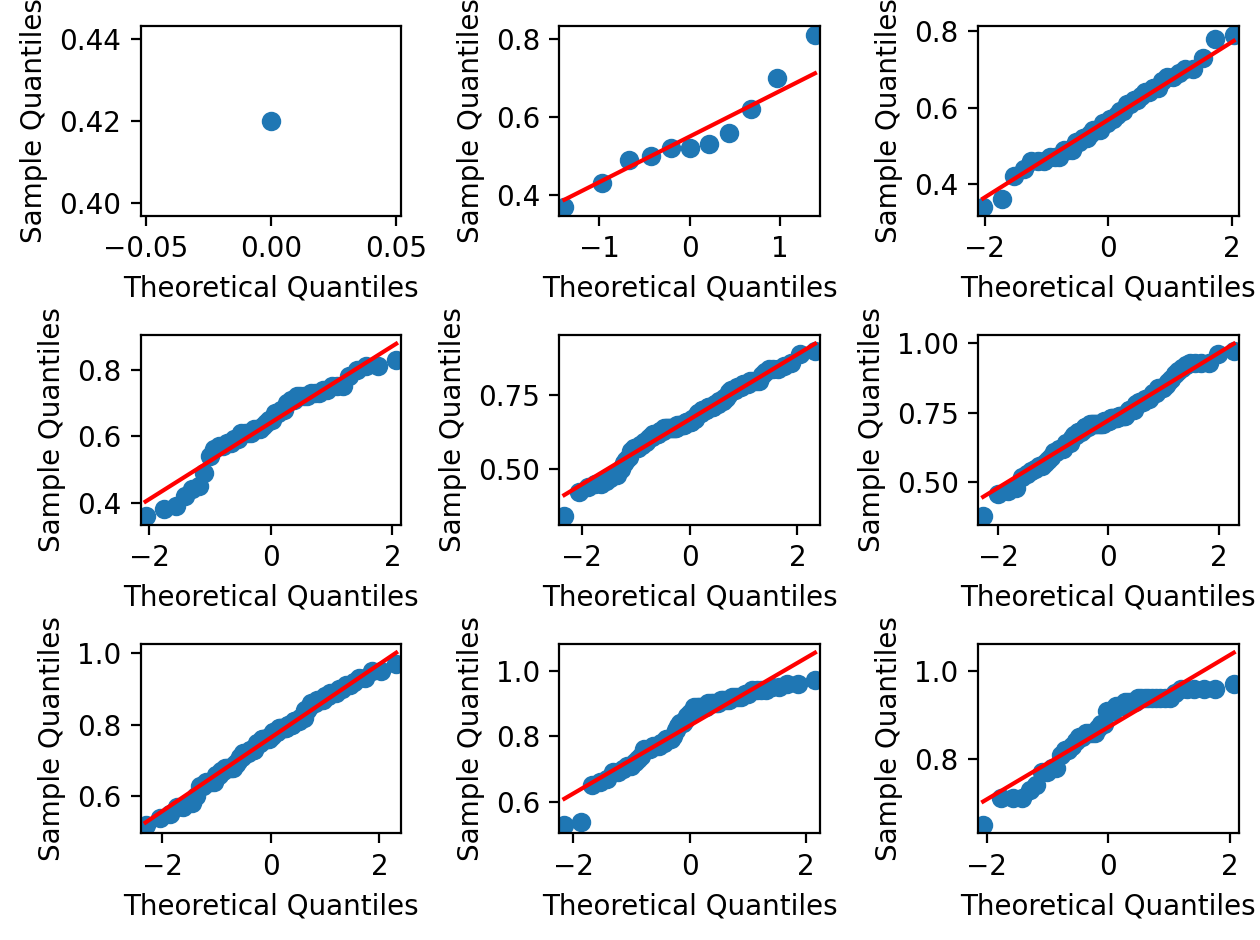

In [ ]:
qqplots(listed_df)

As you can see the above QQ plots, most of the data is normal

In [ ]:
# Assumption 2 of ANOVA
# Variances of different groups of LOR should be equal for which Levene's test can be perofrmed

# H0: Variances of different LOR groups are same.
# HA: Variances of at leats one LOR groups is different.

test_stat,pval=scipy.stats.levene(df2,df3,df4,df5,df6,df7,df8,df9)
if pval<0.05:
    print(f"Variances are not equal")
else:
    print(f"Variances are equal")

Variances are equal


In [ ]:
# Assumption 3 is that each datapoint is independent of each other which is true in case
# of our data.

In [ ]:
# Now we can perform the Anova test

# H0 : The mean of admission chance for different levels of LOR is same
# HA : The mean of admission chance for at least one of the group is different

test_stat,pval=scipy.stats.f_oneway(df1,df2,df3,df4,df5,df6,df7,df8,df9)
if pval<0.05:
    print(f" The mean of admission chance is not same for different levels of LOR with pval = {pval}")
else:
    print(f"The mean of admission chance for different levels of LOR is same.")


 The mean of admission chance is not same for different levels of LOR with pval = 1.2475714296300813e-53


### Hypothesis testing to find the significance of Research
Is there a statistically significant difference in the likelihood of admission between students who have engaged in research and those who haven't?

2 sample t-test can be used for this.

In [ ]:
# Let's check shapiro wilk test

df_nore=df[df['research']==0]['admission_chance']
df_re=df[df['research']==1]['admission_chance']
list2=[df_re,df_nore]
for i in range(len(list2)):
    test_stat,pval=scipy.stats.shapiro(list2[i])
    if pval<0.05:
        print(f"The data is not normal with pval = {pval}")
    else:
        print(f"The data is normal")
# Sometimes shapiro wilk test is overly strict, so we can use qqplot to see if it's data distribution is approximately normal

The data is not normal with pval = 3.8728980911173494e-08
The data is not normal with pval = 0.007273990195244551


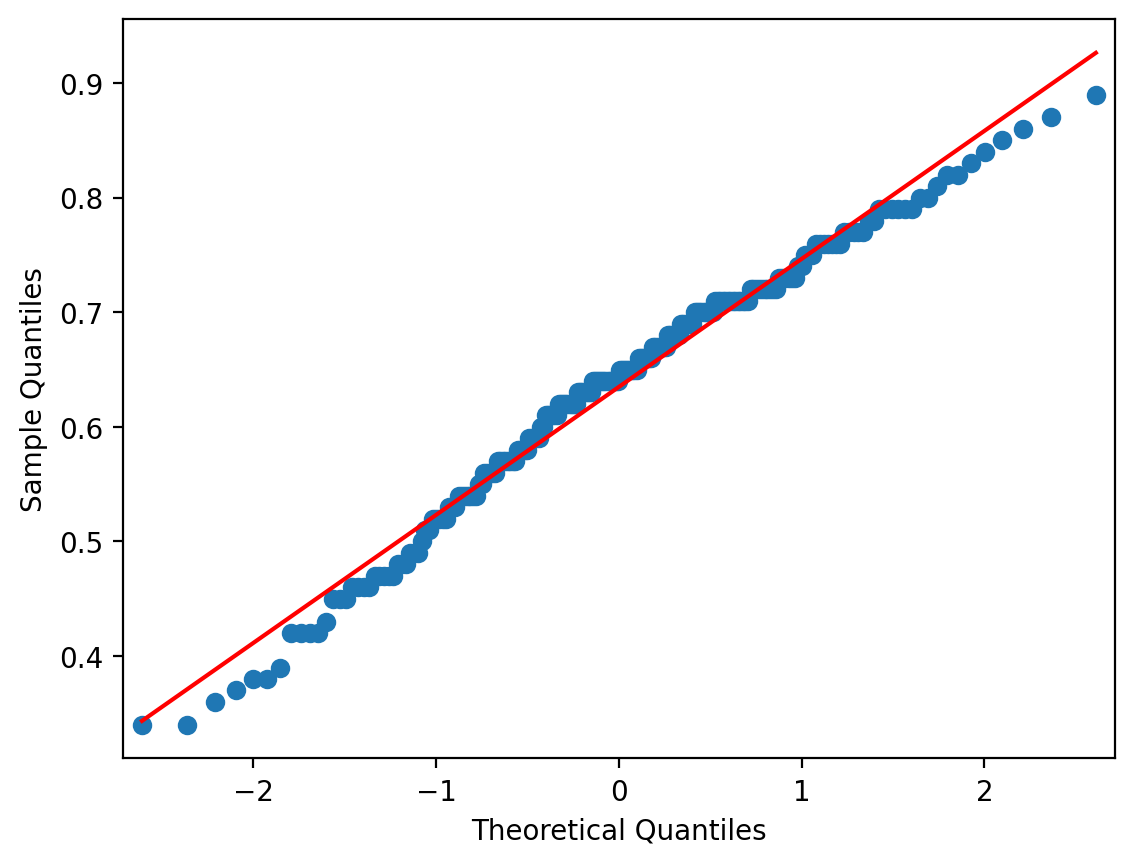

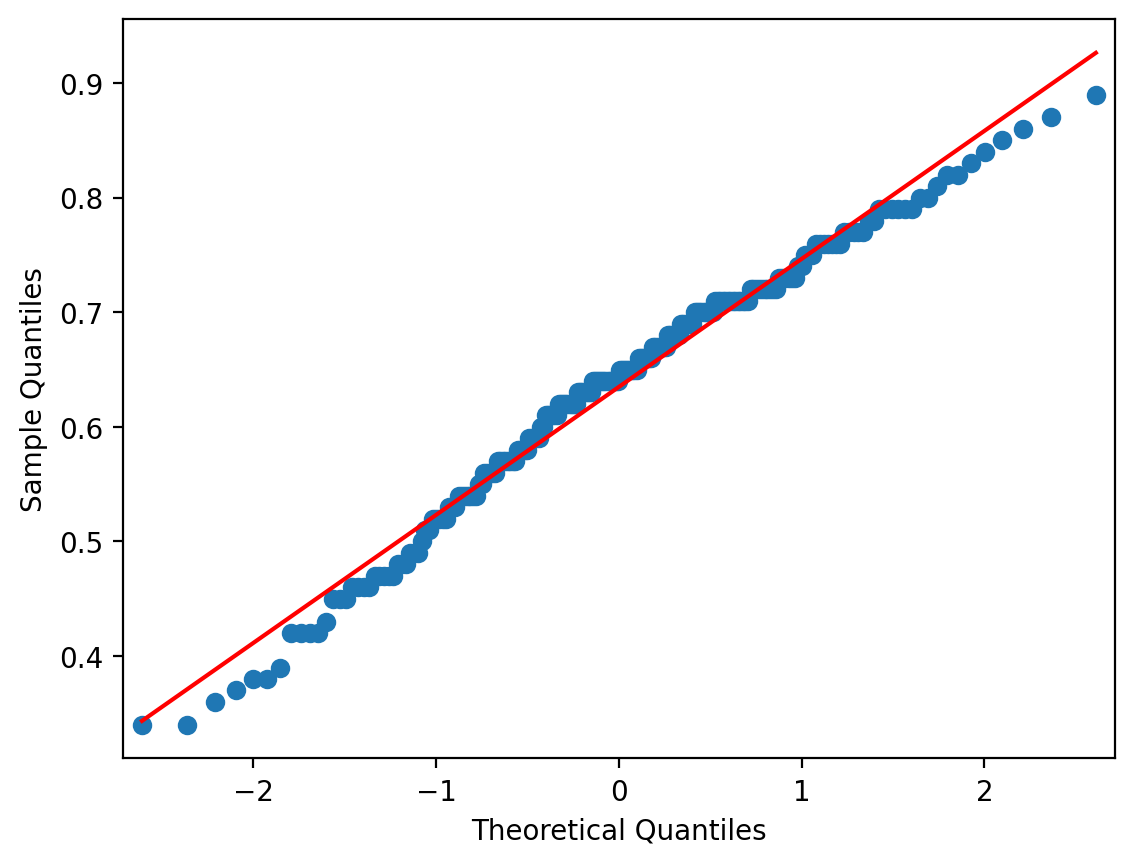

In [ ]:
sm.qqplot(df.loc[df['research'] == 0, 'admission_chance'], line='s',ax=plt.gca())

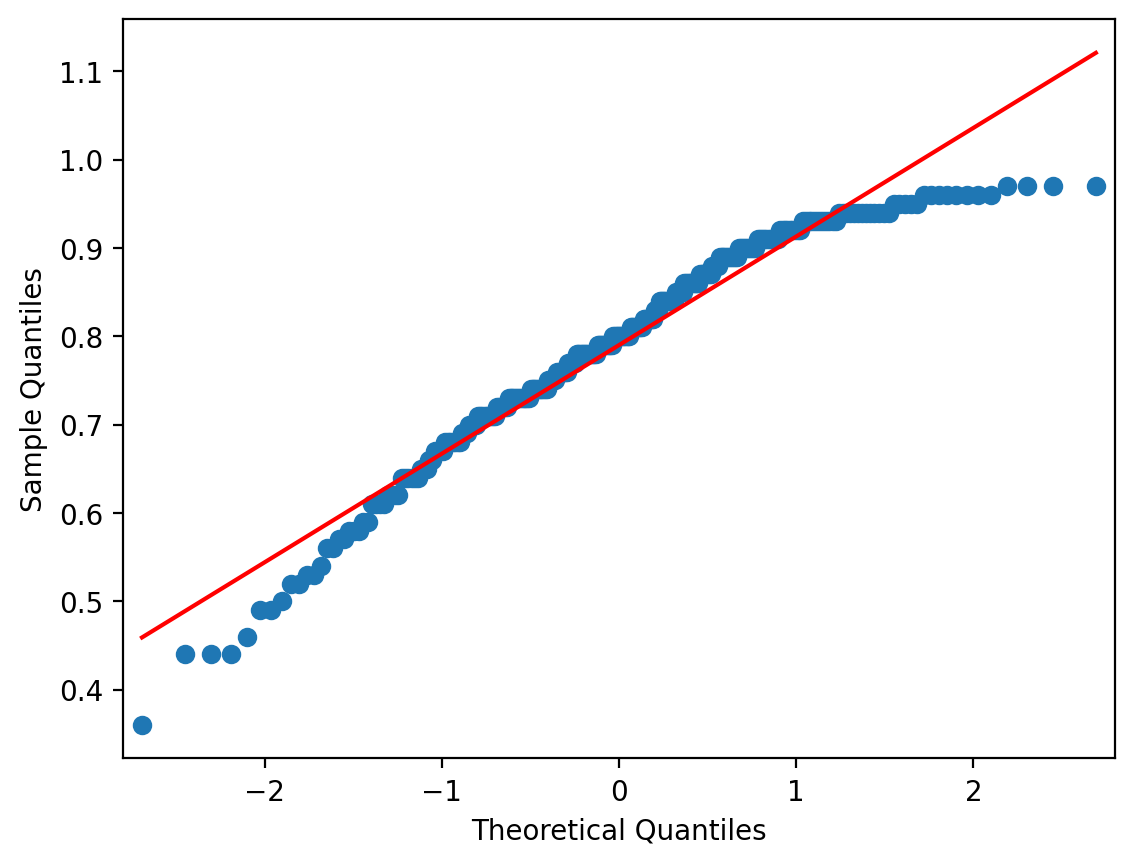

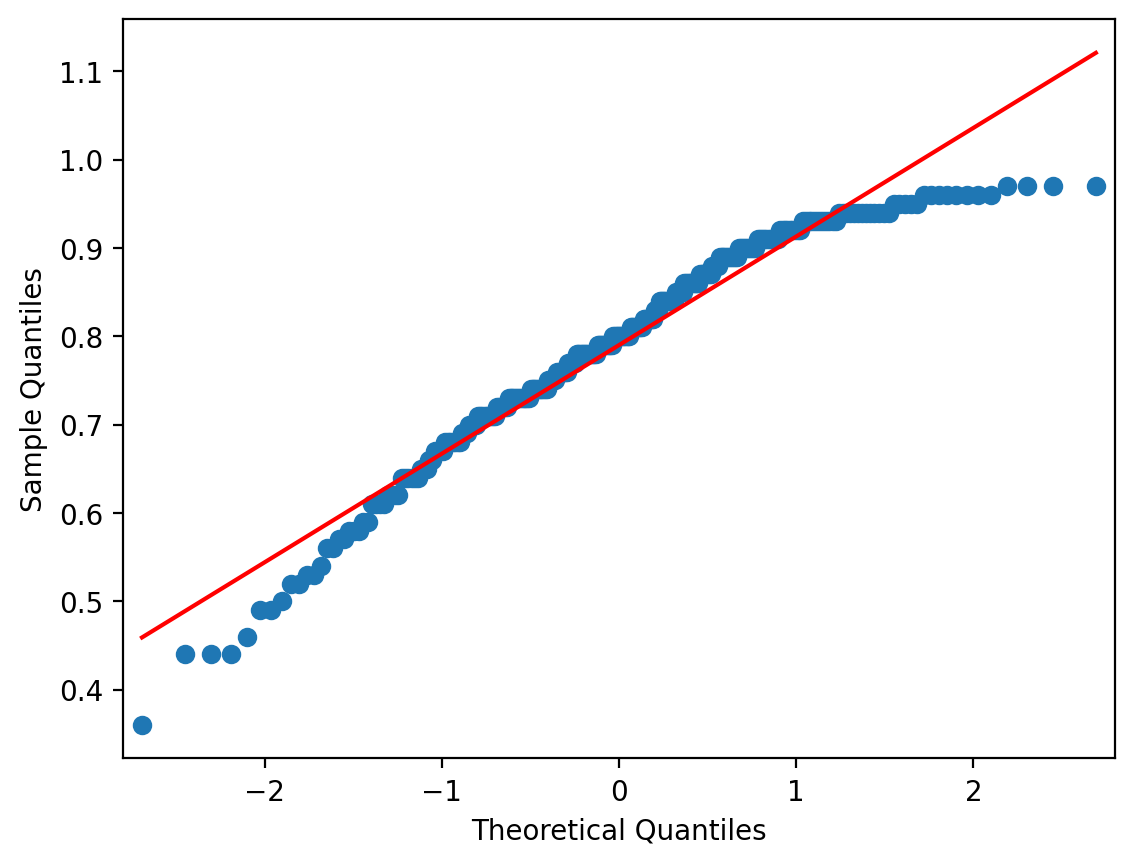

In [ ]:
sm.qqplot(df.loc[df['research'] == 1, 'admission_chance'], line='s',ax=plt.gca())

In [ ]:
# Since the data is normal let's now perform ttest_ind

# H0 : The mean of admission_chance for students who have engaged in research and who haven't is same.
# HA : The mean of admission_chance for students who have engaged in research > who haven't

test_stat,pval=scipy.stats.ttest_ind(df_re,df_nore,alternative='greater')
if pval<0.05:
    print(f"The mean of admission_chance for students who have engaged in research > who haven't")
else:
    print("The mean of admission_chance for students who have engaged in research and who haven't is same.")

The mean of admission_chance for students who have engaged in research > who haven't


## Correlation of GRE and TOEFL scores on Admission Chance

In [ ]:
# H0 : No correlation between GRE score and admission chance
# HA : There is a correlation between GRE score and admission chance
pearson_corr,pval=scipy.stats.pearsonr(df['gre'],df['admission_chance'])
if pval<0.05:
    print(f"GRE score and admission chance are stronly correlated with person correlation coefficient of {round(pearson_corr,2)}")
else:
    print(f" GRE score and admission chance are not that strong correlated")

GRE score and admission chance are stronly correlated with person correlation coefficient of 0.81


In [ ]:
# H0 : No correlation between TOEFL score and admission chance
# HA : There is a correlation between TOEFL score and admission chance
pearson_corr,pval=scipy.stats.pearsonr(df['toefl'],df['admission_chance'])
if pval<0.05:
    print(f"GRE score and admission chance are stronly correlated with person correlation coefficient of {round(pearson_corr,2)}")
else:
    print(f" GRE score and admission chance are not that strong correlated")

GRE score and admission chance are stronly correlated with person correlation coefficient of 0.79


## Feature Engineering
Our dependent variable is admission chance and the independent variables are columns like GRE, TOEFL, University rating, SOP, LOR, Research etc. The  independent variables are increasing with the increase in these dependent variables so we can assume some sort of Regression modelling can be done to predict the admission chance, we will further analyze whether to use Linear regression or polynomial regression.

For Regression model we need to scale our independent features as all of them have different ranges which is done in this section.

* Independent features research is aleady between 0 and 1, so no need of scaling for that.
* Since we have proper ranges of min and max values in each column let's perform normalization using the minmax scaler from preprocessing.


In [ ]:
minmax = MinMaxScaler()
df['gre']=minmax.fit_transform(df['gre'].values.reshape(-1,1))
df['toefl']=np.round(minmax.fit_transform(df['toefl'].values.reshape(-1,1)),2)

cols = ['uni_rating','sop','lor','cgpa']

def minmax_scaling(cols):
    for i in cols:
        df[i]=np.round(minmax.fit_transform(df[i].values.reshape(-1,1)),2)


In [ ]:
minmax_scaling(cols)

In [ ]:
# Scaled Data which is ready to be modeled:
display(df.head(10).style.set_table_styles(table_styles['cerulean_palette']).set_caption("Scaled Data"))

In [ ]:
# Seperating dependent and independent variables
X=df.drop(columns=['admission_chance'])
Y=df['admission_chance']

In [ ]:
# Splitting data into train and test sets.
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

## Regression Modelling
Will analyze and check which regression is best (linar or ploynomial of degree n) based on the R2 (coefficient of determination) values.


In [ ]:
# Function for finding adjusted R2
def adjusted_r2(r2,y,x):
    adjr2 = 1 - (((1-r2)*(len(y)-1))/(len(y)-x.shape[1]-1))
    return adjr2

In [ ]:
# Let's check from degree = 1 to degree = 20 to select which model is the best

degree = 20
train_scores=[] # This list holds all the R2 values for training dataset
test_scores=[] # This list holds all the R2 values for testing dataset

train_loss =[] # This list holds all the mean_squared_error for training dataset
test_loss=[] # This list holds all the mean_squared_error for test dataset

for i in range(1,degree):

    poly_reg = make_pipeline(PolynomialFeatures(i),LinearRegression())
    poly_reg.fit(X_train,Y_train)

    # R2 values are calculated
    train_score=poly_reg.score(X_train,Y_train)
    test_score=poly_reg.score(X_test,Y_test)

    # Append adjusted R-squared values to lists
    train_scores.append(adjusted_r2(train_score,Y_train,X_train))
    test_scores.append(adjusted_r2(test_score,Y_test,X_test))

    # Outputs of train and test data
    output_train=poly_reg.predict(X_train)
    output_test = poly_reg.predict(X_test)

    # Loss values are getting appended
    train_loss.append(mean_squared_error(Y_train,output_train))
    test_loss.append(mean_squared_error(Y_test,output_test))

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=8)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=11)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=12)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=13)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=14)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=16)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=17)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=18)),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=19)),
                ('linearregression', LinearRegression())])

Text(0.5, 0, 'Degree')

Text(0, 0.5, 'Adjusted R2')

Text(0.5, 0, 'Degree')

Text(0, 0.5, 'MSE')

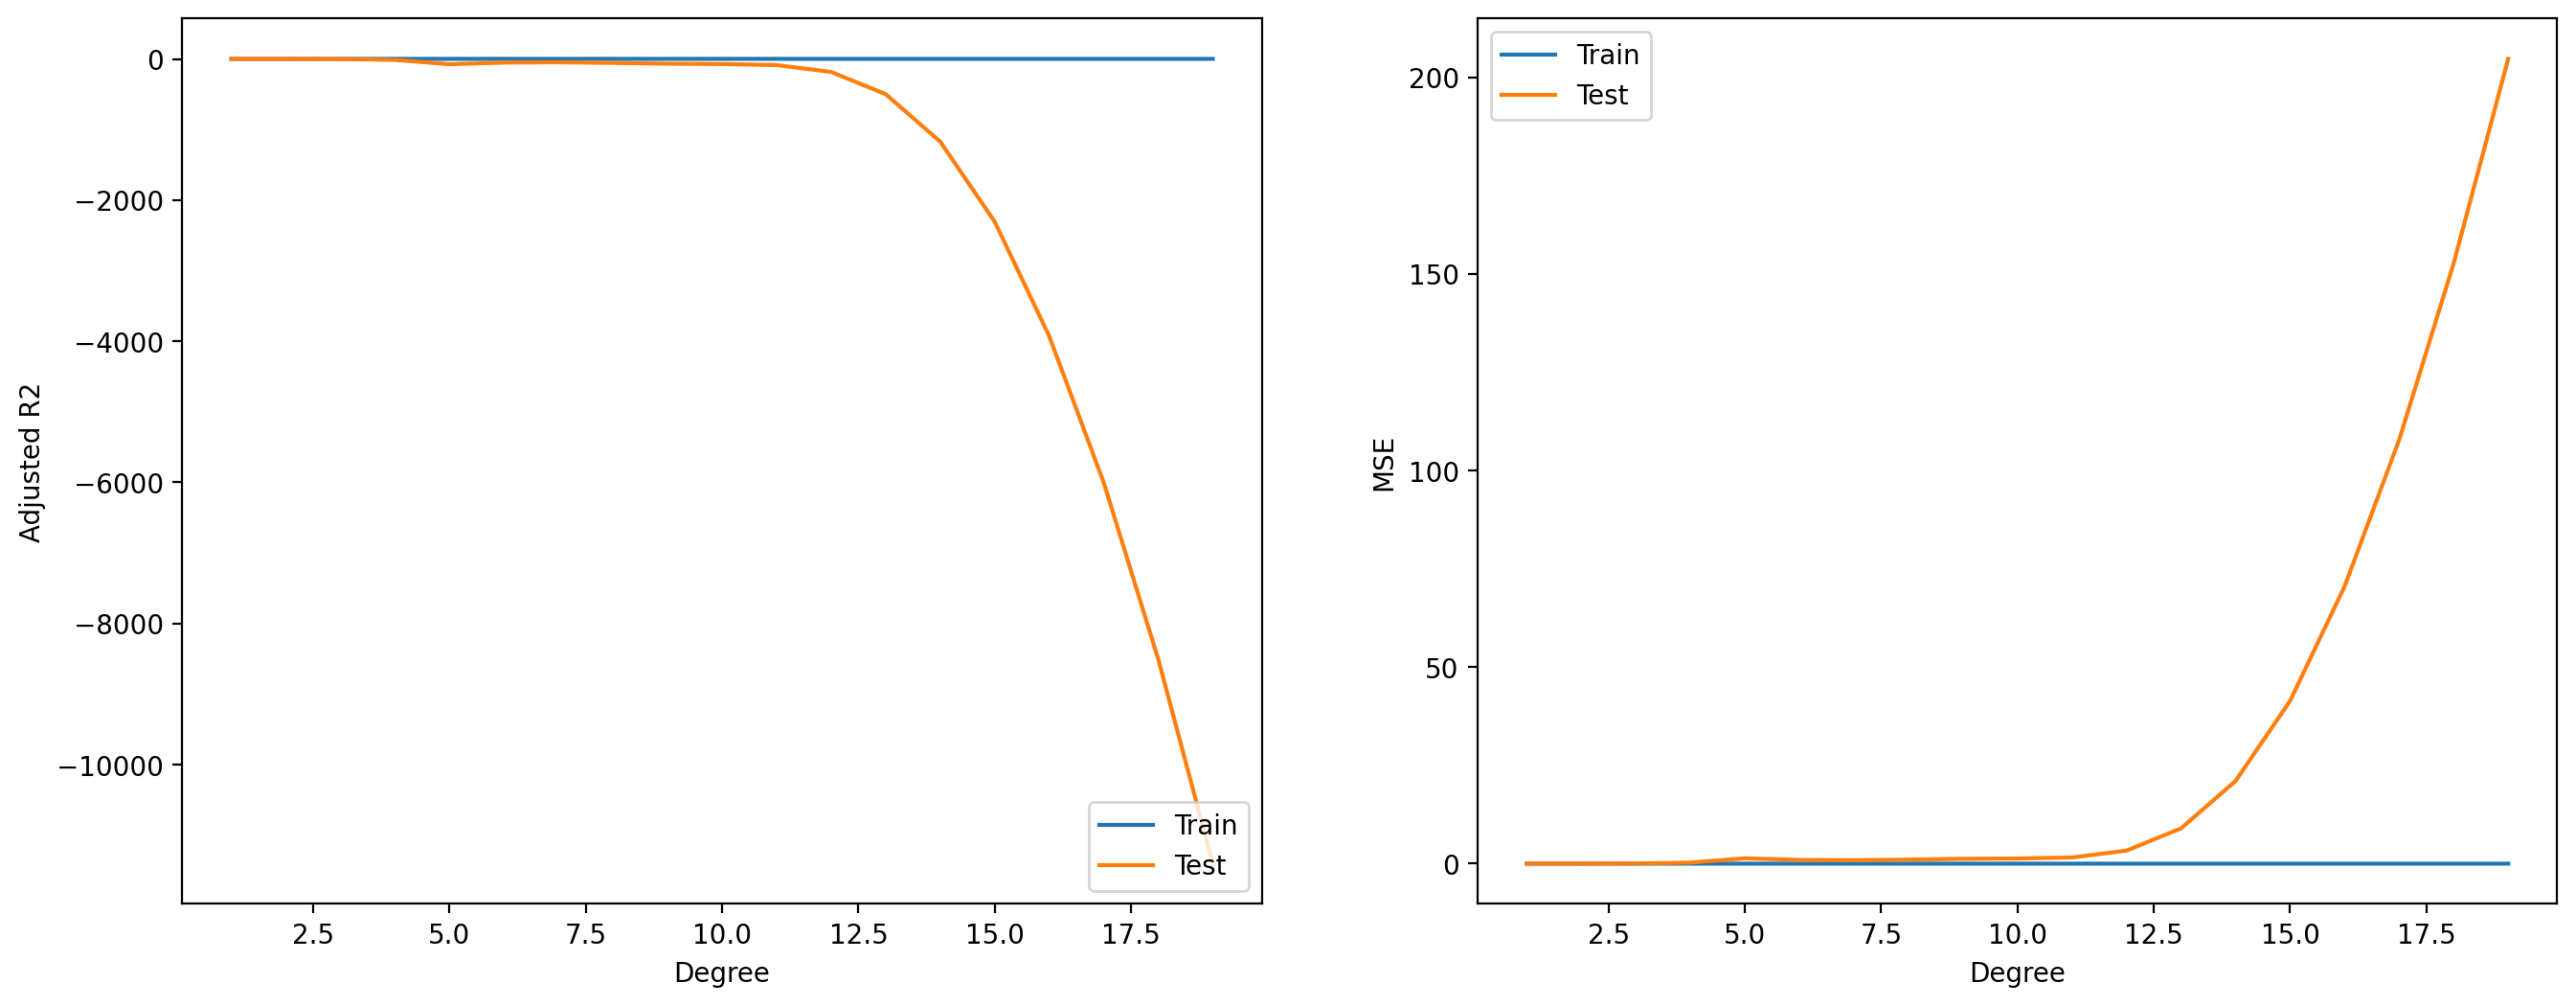

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(16,6))
axes[0].plot(list(range(1,20)),train_scores,label='Train')
axes[0].plot(list(range(1,20)),test_scores, label='Test')
axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Adjusted R2')
axes[0].legend(loc='lower right')

axes[1].plot(list(range(1,20)),train_loss,label='Train')
axes[1].plot(list(range(1,20)),test_loss, label='Test')
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('MSE')
axes[1].legend(loc='upper left')
plt.show()

### Observations from the Degree of polynomial vs Adjusted R-score and MSE
* As we can see in the above plot, the adjusted R-score starts decreasing for the test data after the degree of around 11, which implies the model is overfitting the train dataset for higher degrees.
* We can also see that Mean squared error is increasing significantly for the test data after degree of around 11, so more than degree 11 is not advisable.


* According to the Occam Razor's principle a model performs best when it is simple, so we are considering degree of 1 as we do not want to complicate the model with higher degree.
* Moreover in previous part of analysis we saw that the correlation coefficients of pearson correlation and spearman correlation is almost equal which says that the data lacks polynomial relationship.

## Assumptions of Linear Regression
* Linearity of the data.
* No multicollinearity.
* Normality of Residuals
* No heteroskedacity
* No autocorrelation

### Assumption 1:
Checking linearity of the Data

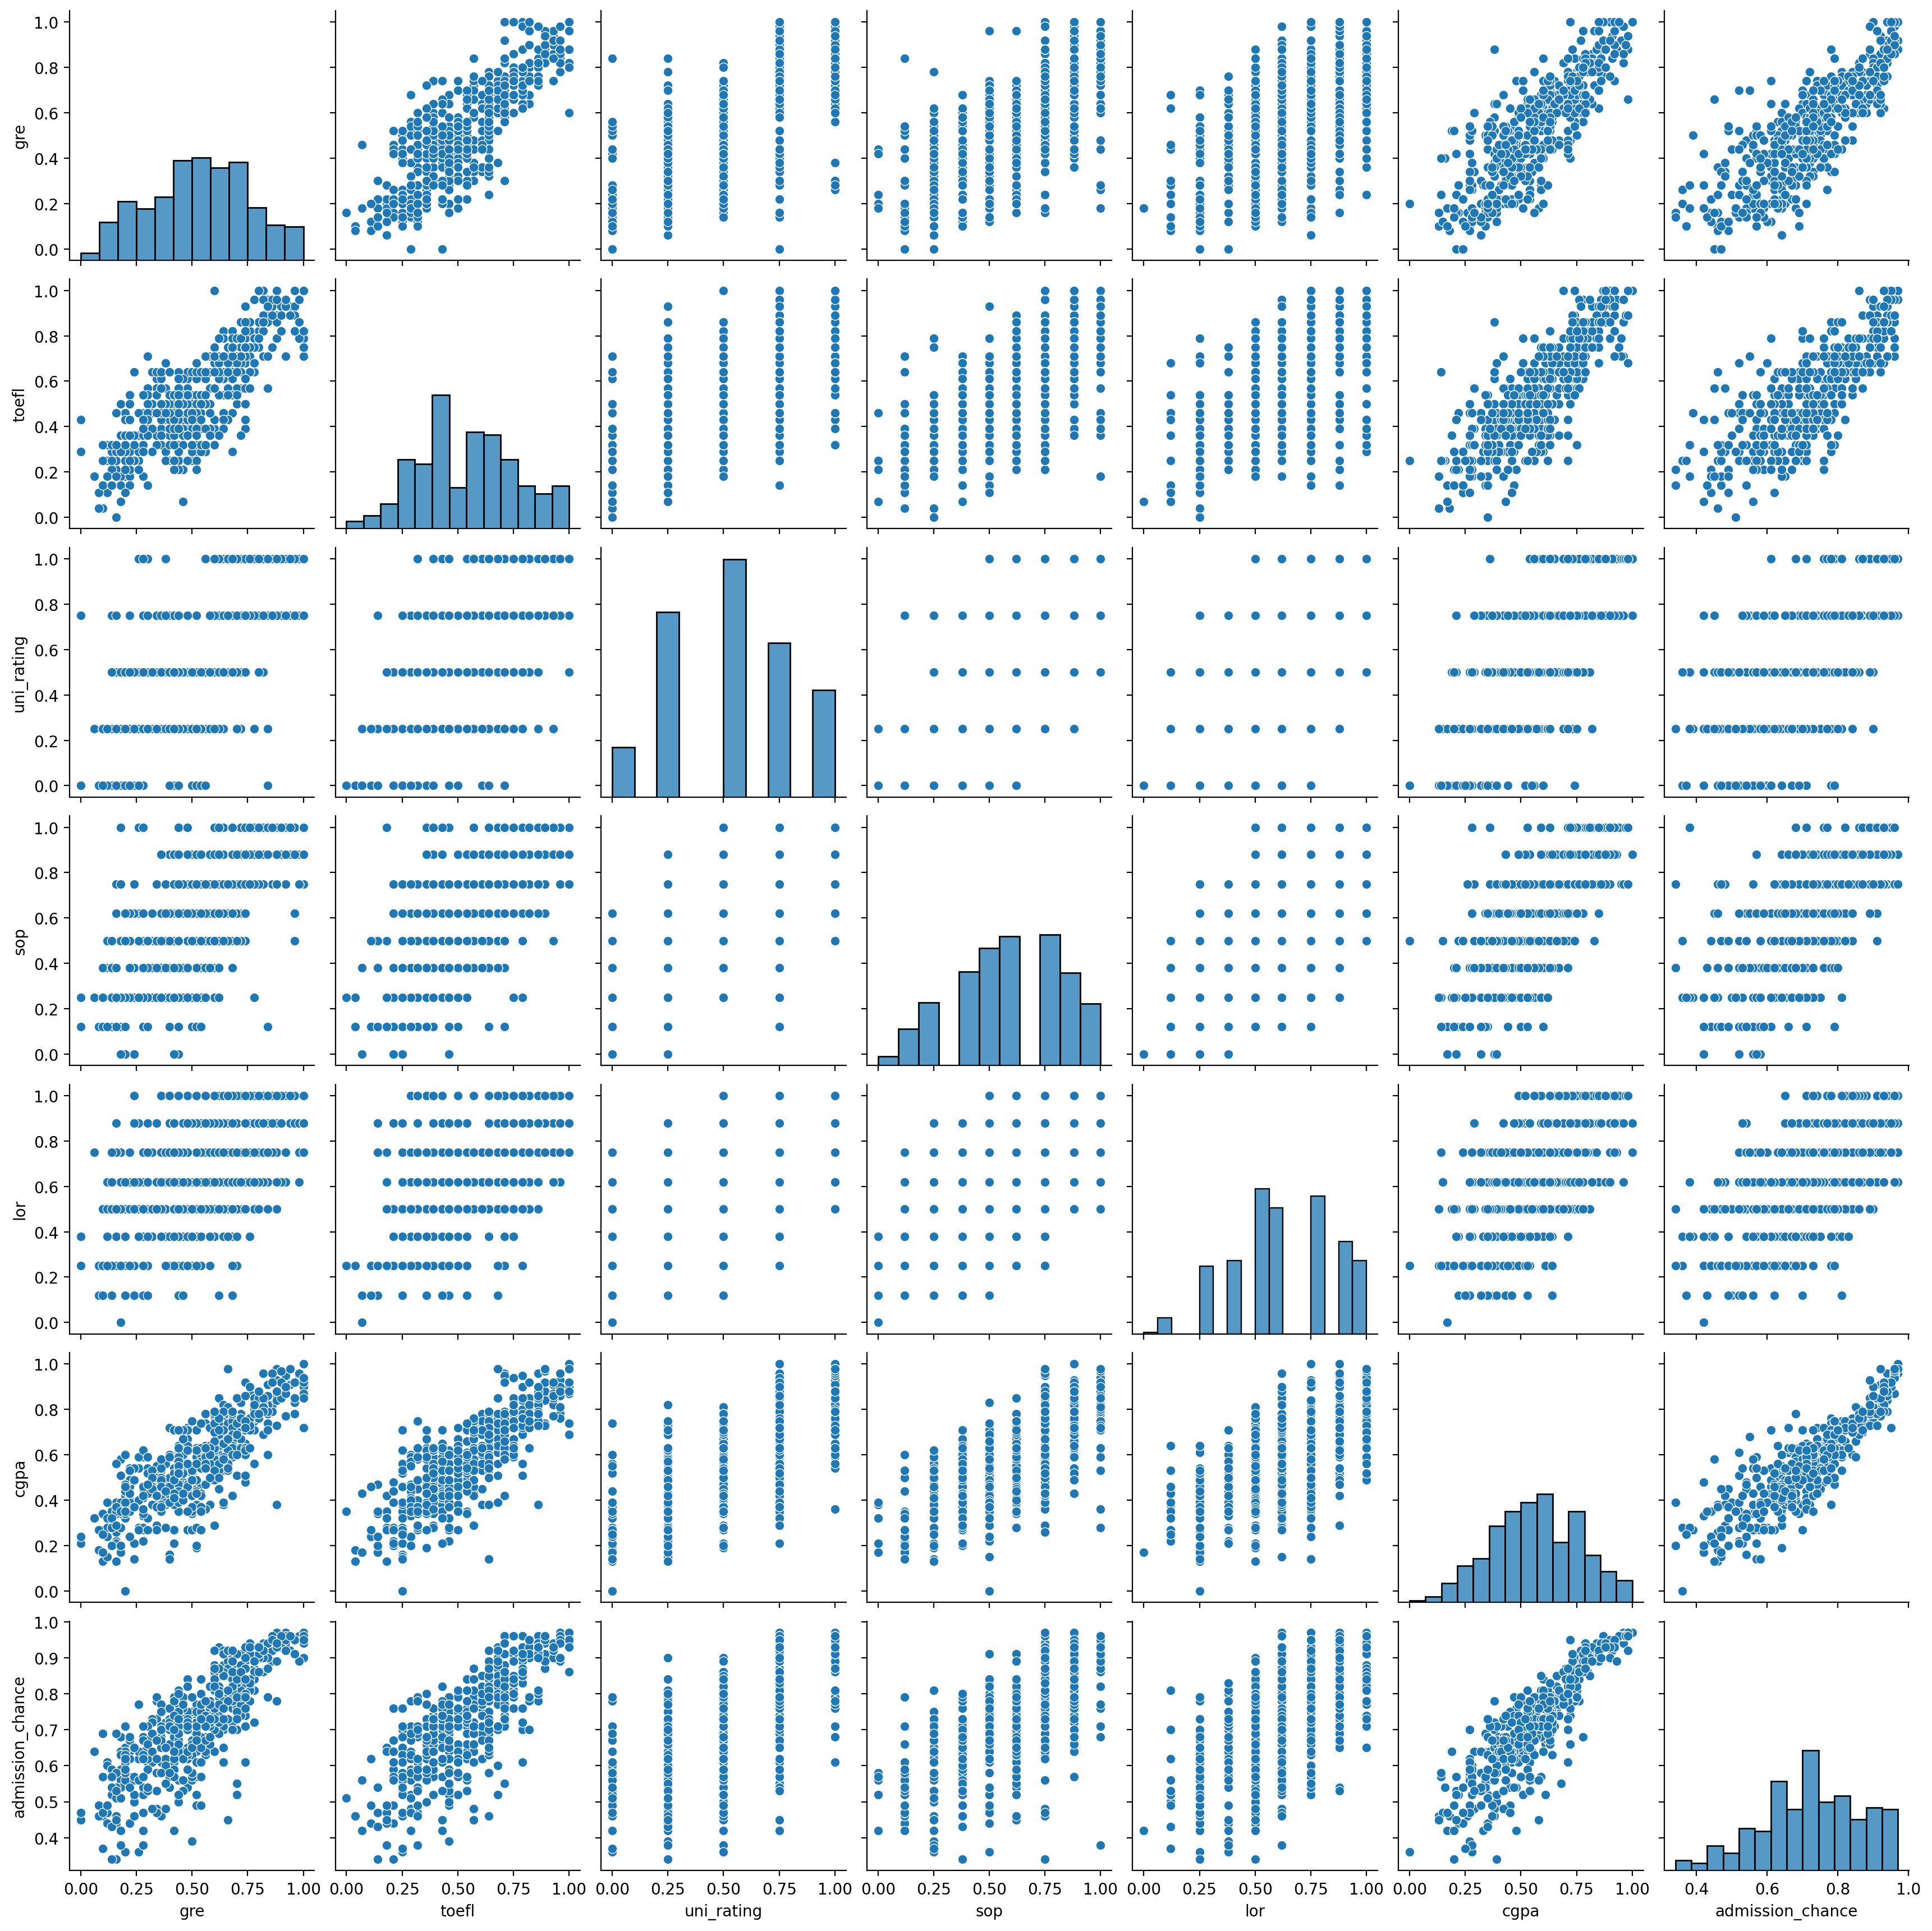

In [ ]:
sns.pairplot(df)

As can be seen from the above plot, all most all of the independent variables are having a linearly increasing relationship with admission_chance which is our dependent variable.

In [ ]:
## Let's check whether all independent variables are important to us or not
## Statsmodels provides a function OLS which gives a summary to explain this.

X_train_sm = sm.add_constant(X_train)# In statsmodels constant will not be added by default
X_test_sm = sm.add_constant(X_test)
model=sm.OLS(Y_train,X_train_sm)
result = model.fit()
display(result.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       admission_chance   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.3
Date:                Sun, 05 May 2024   Prob (F-statistic):          2.71e-142
Time:                        08:08:30   Log-Likelihood:                 559.02
No. Observations:                 400   AIC:                            -1102.
Df Residuals:                     392   BIC:                            -1070.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3517      0.010     34.466      0.000       0.332       0.372
gre            0.0925      0.029      3.168      0.002       0.035       0.150
toefl          0.0896      0.028      3.174      0.002       0.034       0.145
uni_rating     0.0237      0.018      1.338      0.182      -0.011       0.058
sop            0.0127      0.020      0.624      0.533      -0.027       0.053
lor            0.0587      0.019      3.165      0.002       0.022       0.095
cgpa           0.3618      0.034     10.694      0.000       0.295       0.428
research       0.0197      0.007      2.642      0.009       0.005       0.034
==============================================================================
Omnibus:                       81.148   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.694
Skew:                          -1.069   Prob(JB):                     2.34e-37
Kurtosis:                       5.355   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference from the Results Summary

In the results summary we can see the P>|t| column which shows us the p values of all the independent features to show which features are significant in predicting the admission chance i.e the dependent variable.

**H0** :*Null hupothesis is that the coefficient of predictor is zero and has no effect on the target variable.*

**HA** : *Alternative hypothesis is that the coefficient of predictor is non zero and has an effect on the target variable.*

Let us assume alpha to be 0.01 which is 99% confidence interval

* According to the above signifiance level (alpha) decided the features uni_rating and sop can be removed as it's p value is not less than the significance level.
* In the model, "research", "gre", "toefl", "lor", and "cgpa" are impactful and statistically significant predictors, whereas "University Rating" and "SOP" lack statistical significance, implying they may not be robust predictors in the presence of other variables.
* As we can see in the above table the adjusted R2 and R2 are almost close which indicates we are not simply adding meaningless independent features and most of our independent features have an impact on the target variable.

In [ ]:
# Dropping features SOP and uni_rating
X_train.drop(columns = ['sop'],inplace=True)
X_test.drop(columns = ['sop'],inplace=True)

X_train_sm.drop(columns = ['sop'],inplace=True)
X_test_sm.drop(columns = ['sop'],inplace=True)

X_train.drop(columns = ['uni_rating'],inplace=True)
X_test.drop(columns = ['uni_rating'],inplace=True)

X_train_sm.drop(columns = ['uni_rating'],inplace=True)
X_test_sm.drop(columns = ['uni_rating'],inplace=True)

### Recalculating the model removed features

In [ ]:
model = sm.OLS(Y_train,X_train_sm)
results_new=model.fit()
display(results_new.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       admission_chance   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     358.4
Date:                Sun, 05 May 2024   Prob (F-statistic):          3.97e-144
Time:                        08:08:31   Log-Likelihood:                 557.32
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     394   BIC:                            -1079.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3483      0.010     35.018      0.000       0.329       0.368
gre            0.0936      0.029      3.215      0.001       0.036       0.151
toefl          0.0973      0.028      3.488      0.001       0.042       0.152
lor            0.0719      0.017      4.275      0.000       0.039       0.105
cgpa           0.3787      0.032     11.687      0.000       0.315       0.442
research       0.0208      0.007      2.792      0.006       0.006       0.035
==============================================================================
Omnibus:                       75.593   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.685
Skew:                          -1.015   Prob(JB):                     1.15e-33
Kurtosis:                       5.231   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference from the Results Summary
* This time the P>|t| values for all the remaining independent features are way below the significance level assumed so we are not going to remove any more features.

* Now we can check if there is multicollinearity in any of the remaining independent features, if yes we have to handle them as they can cause us to wrongly interpret the weights of each independent variable.


### Assumption 2:

**Checking for Multi-collinearity:**
* Multicollinearity arises when two or more predictor variables in a regression model are highly correlated.
* High correlation between predictor variables means that one predictor variable can be linearly predicted from the others with a high degree of accuracy.
* Multicollinearity can be checked by calculation variance inflation factor (VIF) for each independent variable.
* VIF value above 5 is considered high.
* Let's calculate VIF factor for each independent variable and check.

**Handling multicollinearity if it exists:**
* We can remove highly correlated predictors: If some variables are highly correlated,we can consider removing one from our analysis, especially if it does not add much unique information.

In [ ]:
# There is no function in sklearn to compute VIF so let's take help from statsmodels
# Let's define some thresholds values for vif and r2 below, this will ensure we do not remove too many features which may result in a bad model.

vif_threshold = 5
r2_threshold = 0.75
features_removed=[] # This list will contain all the independent variables which are removed due to high multicollinearity
current_r2 = results_new.rsquared
X_temp_sm = sm.add_constant(X_train)



In [ ]:
# This loop will run until we reach the vif_threshold or r2_threshold or till our highest VIF feature is const
# This loop will calculate VIF for each feature
while True:
    vif_data = {
        'Features': X_temp_sm.columns,
        'vif':[variance_inflation_factor(X_temp_sm.values,i) for i in range(X_temp_sm.shape[1])]
    }
    vif = pd.DataFrame(vif_data).sort_values(by="vif", ascending=False)

    # Remove feature with highest VIF and check R^2
    highest_vif_feature = vif.iloc[0]['Features']

    # Drop from X_temp_sm, not X_train
    X2 = X_temp_sm.drop(columns=[highest_vif_feature])

    sm_model = sm.OLS(Y_train, X2).fit()

    # Check VIF and R^2 thresholds
    if vif.iloc[0]['vif'] < vif_threshold or sm_model.rsquared < r2_threshold or highest_vif_feature == 'const' :
        display(vif)
        print(f'Reached Threshold:')
        print(f'\tHighest VIF {highest_vif_feature}: {vif.iloc[0]["vif"]}')
        print(f'\tR2 if {highest_vif_feature} is removed: {sm_model.rsquared}')
        print(f'\tCurrent R2: {current_r2}')
        print(f'\nFeatures removed: {len(features_removed)}')
        print(f'List of features removed: {features_removed}')
        break
    # Update variables for the next iteration
    display(X_temp_sm)
    X_temp_sm = X_temp_sm.drop(columns=[highest_vif_feature])
    features_removed.append(highest_vif_feature)
    current_r2 = sm_model.rsquared

Features        vif
0     const  10.802522
1       gre   4.824189
4      cgpa   4.324600
2     toefl   4.147362
3       lor   1.703166
5  research   1.498199

Reached Threshold:
	Highest VIF const: 10.802521618093982
	R2 if const is removed: 0.9725065926755008
	Current R2: 0.8197546192928237

Features removed: 0
List of features removed: []


### Inference from the above vif dataframe
* There is some level of multicollinearity in the dataset with vif around 4, however for balance in model performance we should not remove all the features.
* Gre score has the highest variance inflation factor among the features.
* No features were removed as none of the features have VIF above our threshold which is 5.


### Assumption 3
Checking normality of residuals

To check normality of residuals we can plot QQ plots for the residuals

LinearRegression()

<Axes: >

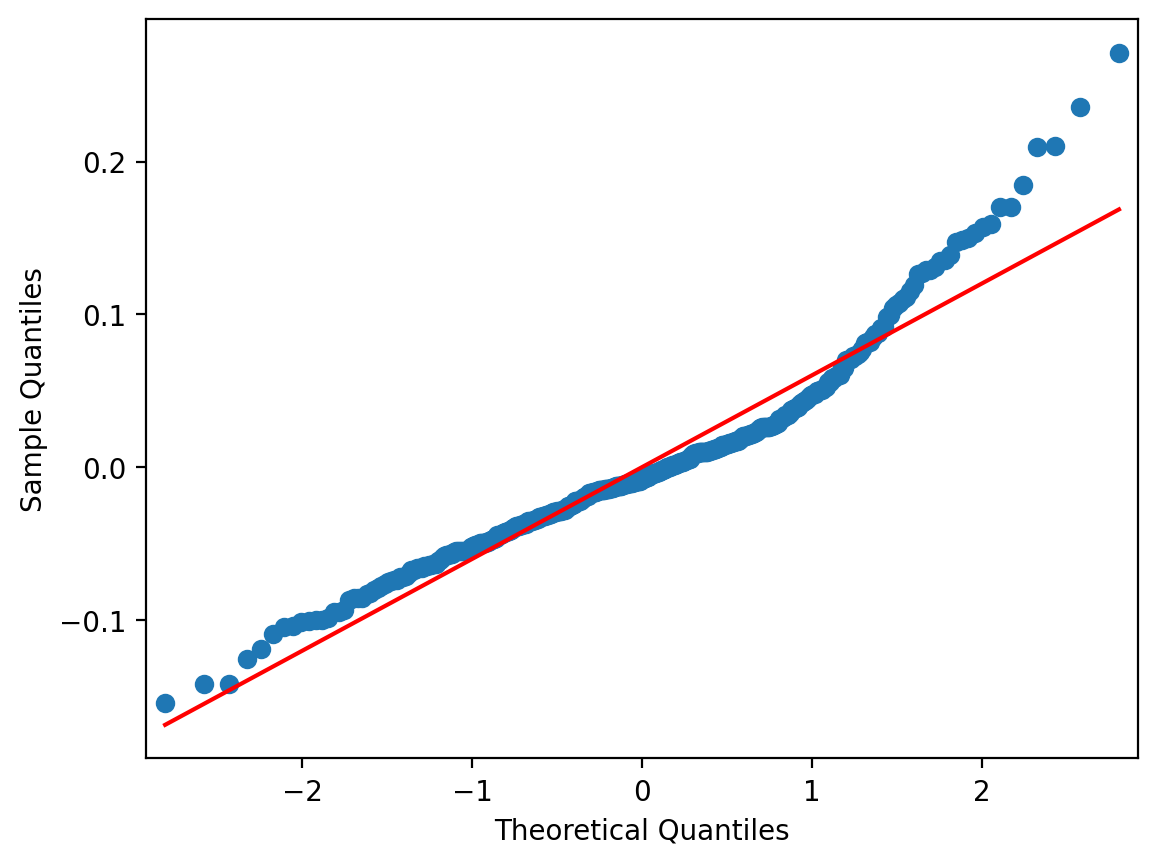

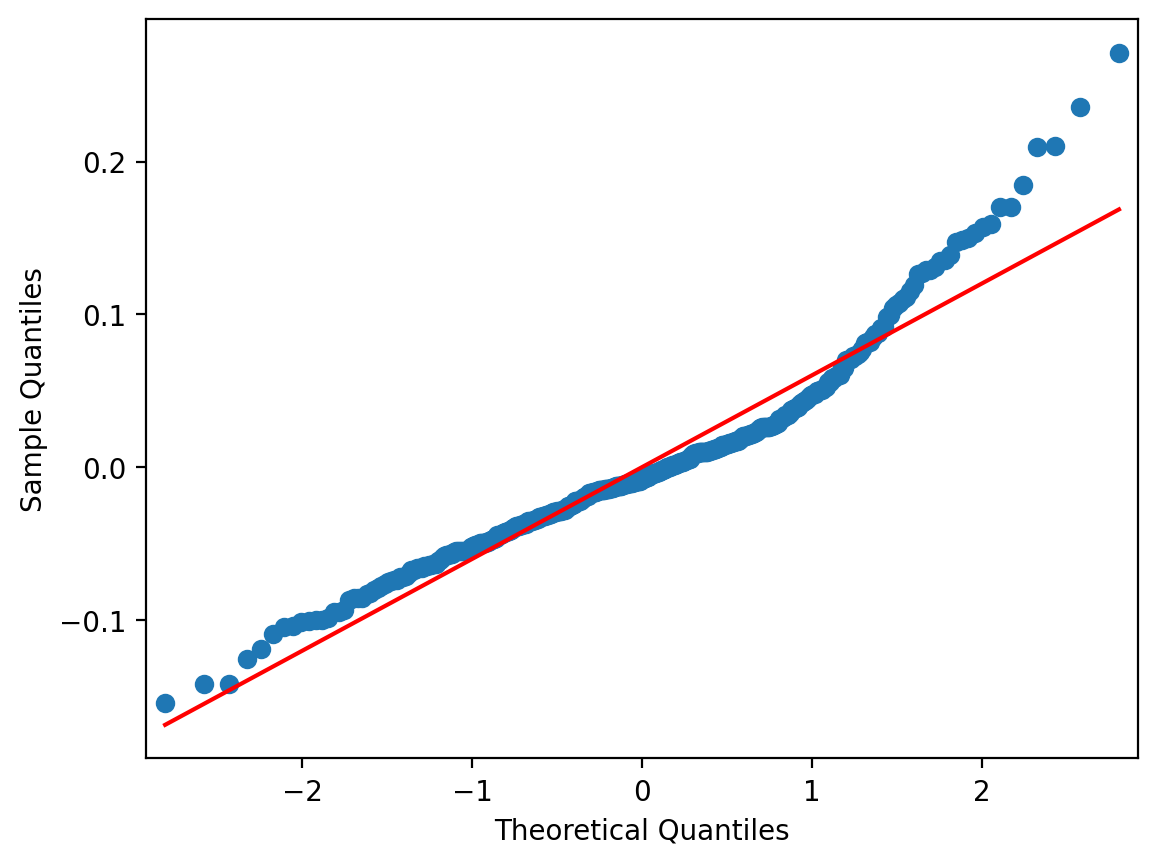

In [ ]:
## QQ plot for residuals
model=LinearRegression()
model.fit(X_train,Y_train)
predicted = model.predict(X_train)
residuals = (model.predict(X_train)-Y_train)

plt.subplot(1,1,1)
sm.qqplot(residuals,line='s',ax=plt.gca())
plt.show()

* The above QQ plots show that error of the training dataset are almost normally distributed which proves normality assumption true.

### Assumption 4
Checking for Heteroskedasticity

* Hetroskedasticity means the variability of a dependent variable (or "response variable") differs across different values of an independent variable (or "predictor variable"). In simpler terms, it means that the spread of data points around the regression line (or another model) is not consistent across all levels of the independent variable.

<Figure size 400x400 with 0 Axes>

<Axes: ylabel='admission_chance'>

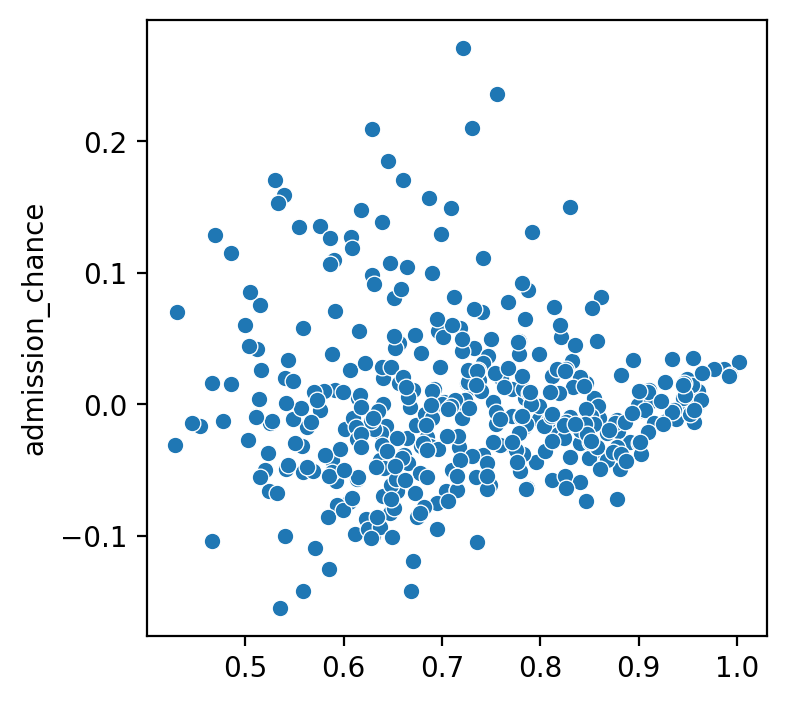

In [ ]:
### Plotting residuals vs the predicted y values for checking heteroskedasticity
plt.figure(figsize=(4,4))
sns.scatterplot(x=predicted,y=residuals)
plt.show()

### Inference from the above residual vs predicted values plot
* As we can see there is increasing or decreasing trend for residuals with increasing or decreasing values of the predicted values.
* Hence we can say that there is no heteroskedasticity

### Final Step
* We will choose the features gre,cgpa,toefl,lor and research for traning our linear model. (Which was decided upon Occam Razor's principle)
* We will find R2 and mean squared error for our filtered set of features.
* Draw conclusions and explain the model performance.

In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)

predicted_train = model.predict(X_train)
predicted_test = model.predict(X_test)

train_r2score = model.score(X_train,Y_train)
test_r2score = model.score(X_test,Y_test)

mse_train = mean_squared_error(Y_train,predicted_train)
mse_test = mean_squared_error(Y_test,predicted_test)

print(f" R2 score of the model on the training dataset : {train_r2score}")
print(f" R2 score of the model on the test dataset : {test_r2score}")

print(f" MSE of the model on the training dataset : {mse_train}")
print(f" MSE of the model on the test dataset : {mse_test}")


LinearRegression()

 R2 score of the model on the training dataset : 0.8197546192928237
 R2 score of the model on the test dataset : 0.8232941287581387
 MSE of the model on the training dataset : 0.0036084934833393338
 MSE of the model on the test dataset : 0.003412367079551585


## Insights and Recommendations

<Figure size 500x500 with 0 Axes>

<Axes: ylabel='admission_chance'>

Text(0.5, 0, 'Fitted values')

Text(0, 0.5, 'True Values')

Text(0.5, 1.0, 'True vs. Fitted values plot')

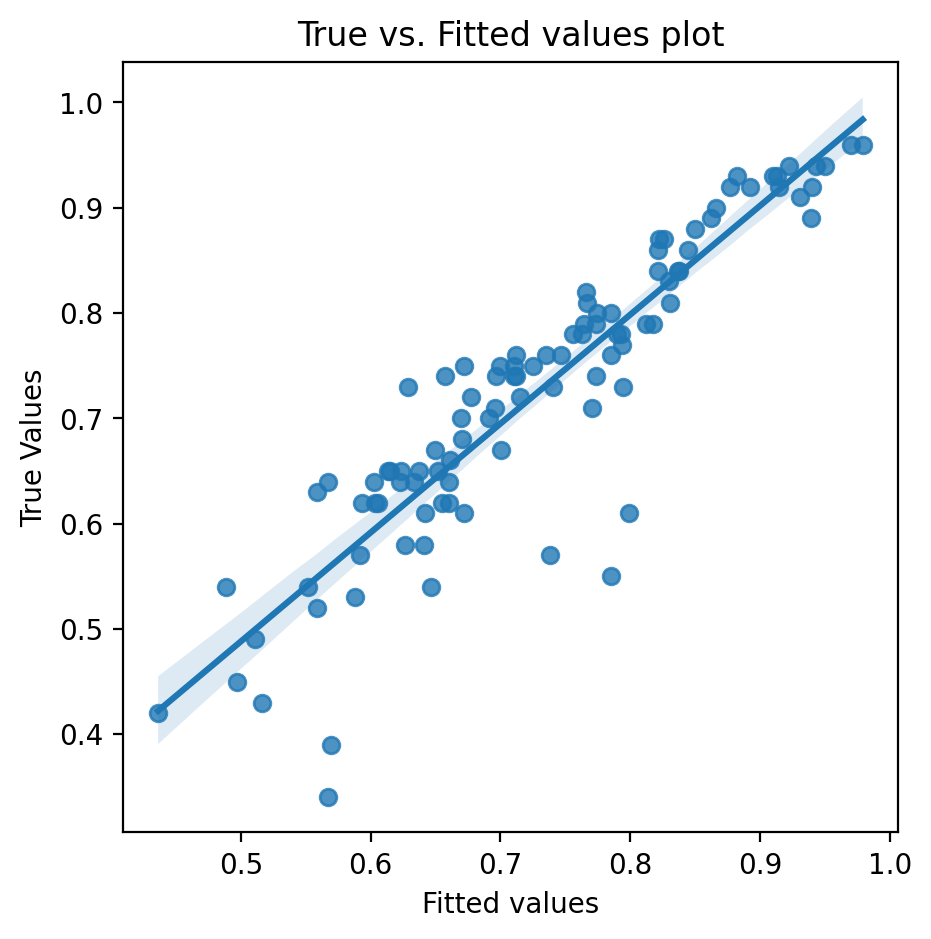

In [ ]:
# Plotting fitted values vs true value
plt.figure(figsize=(5,5))
sns.regplot(y=Y_test,x=predicted_test)
plt.xlabel("Fitted values")
plt.ylabel("True Values")
plt.title("True vs. Fitted values plot")
plt.show()

**Linearity**: The data points cluster around the diagonal line, which means that the linear model's assumptions are largely met. The model seems to do a relatively good job of predicting the true values, especially as the "amdission_chacne" increases.

**Confidence Interval**: The shaded region indicates the confidence interval for the fitted regression line. For most parts, it's relatively narrow, which is good. It means the model's predictions are fairly certain. However, in areas where the confidence interval widens, it indicates greater uncertainty in the model's predictions.

**Model's accuracy**: As seen from the above regplot the model's accuracy seems to increase as the admission chance increases which can be inferred from closeness of points to the fitted line.

**Over model performance**: The model seems to be a decent fit but still there is a room for improvement especially near the lower admission chance.

### Correlation and Key findings:
* All variables have a positive correlation with the "Chance of Admit".
* CGPA, TOEFL, and GRE are the most positively correlated with admission chances.
* Students with a GRE Score of 330+ or a TOEFL score above 110 have higher admission chances.
* Students with a research background have a significantly higher likelihood of admission.

### Model Performance
* The model achieved an R-squared value of 0.8232 on the testing data, indicating that it explains approximately 82.32% of the variability in the "admission_chance".
* The model satisfactorily fulfills all the Assumptions of Linear Regression.
* The Mean Squared Error (MSE) 0.0034 on the test dataset indicating a good fit of the model.

### Recommendations for Jamboree Education
**Focus on Key Metrics**: Encourage students to prioritize improving their GRE, TOEFL scores and LOR as these have the strongest correlation with admission chances.

**Promote Research Experience**: Given its positive correlation with admission chances, students should be informed about the importance of having a research background.
